In [1]:
# Code for parsing and summarizing MODE contingency table output statistics
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
missing_dates = [pd.Timestamp(2016, 1, 12, 12),
                 pd.Timestamp(2016, 1, 13, 12),
                 pd.Timestamp(2016, 1, 6, 12),
                 pd.Timestamp(2016, 5, 11, 12),
                 pd.Timestamp(2016, 1, 24, 12),
                 pd.Timestamp(2016, 1, 25, 12),
                 pd.Timestamp(2016, 5, 10, 12),
                 pd.Timestamp(2016, 5, 27, 12),
                 pd.Timestamp(2016, 5, 24, 12),
                 pd.Timestamp(2016, 5, 14, 12),
                 pd.Timestamp(2016, 5, 16, 12),
                 pd.Timestamp(2016, 5, 31, 12),
                 pd.Timestamp(2016, 5, 28, 12)]

In [ ]:
dates = pd.date_range(start='2016-05-02T12',
                     end='2016-05-31T12',
                     freq='1D')

In [ ]:
member = 'control_thompson'
csi_data = {}
for thresh in [1]:
    for radius in [4]:
#        area = 128
         for area in [0]:
            for interest in [0.7]:
#             interest = 0.8
                data = []
                for date in dates:
                    domain = 2
                    fhour = 36
                    valid = date + pd.Timedelta(hours=fhour)
                    file = ('/lustre/scratch/twixtrom/adaptive_verif_test/'+member+'/'+date.strftime('%Y%m%d%H')+'/'+str(thresh)+'/'+str(radius)+'/'+str(area)+'/'+str(interest)+'/'+
                            str(domain)+'/'+str(fhour)+'/mode_'+str(fhour)+'0000L_'+valid.strftime('%Y%m%d')+'_'+valid.strftime('%H')+'0000V_010000A_cts.txt')
                    try:
                        cts_file = pd.read_csv(file, delim_whitespace=True)
                        data.append(cts_file['CSI'][1])
                    except FileNotFoundError:
                        data.append(np.nan)
                csi_data[str(thresh)+'-'+str(radius)+'-'+str(area)+'-'+str(interest)] = np.array(data)

In [ ]:
dataframe = pd.DataFrame(data=csi_data)

In [ ]:
dataframe.plot.box(figsize=(20,20))

## Object Based Verification

### CSI, May 2016

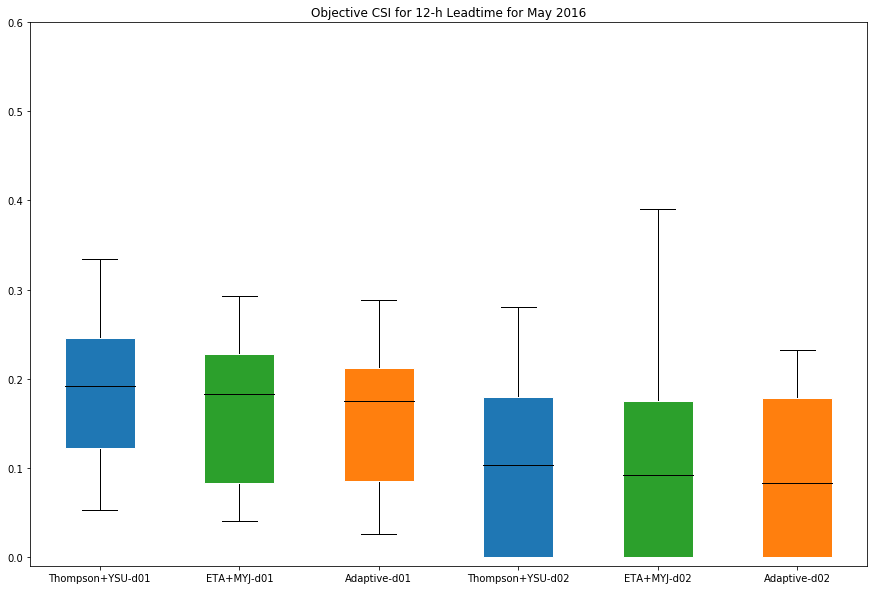

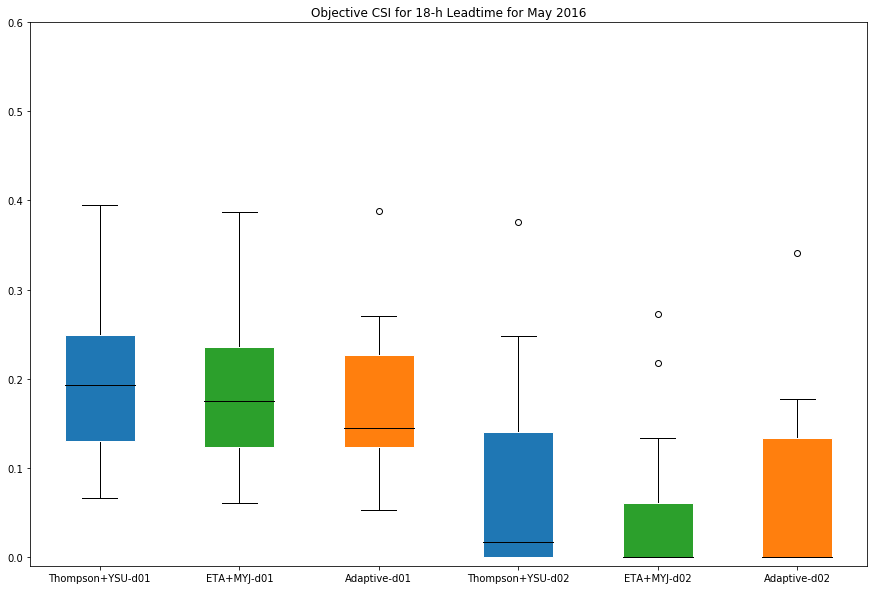

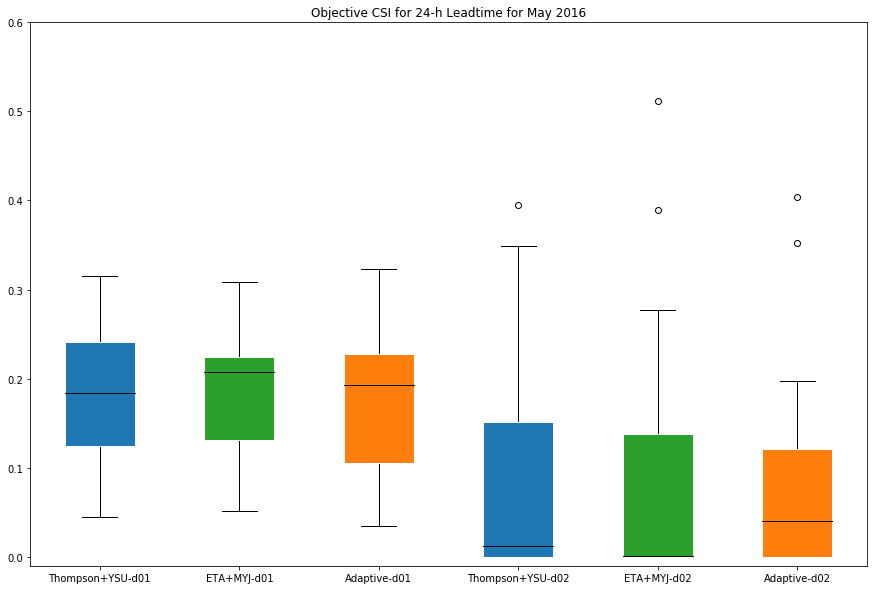

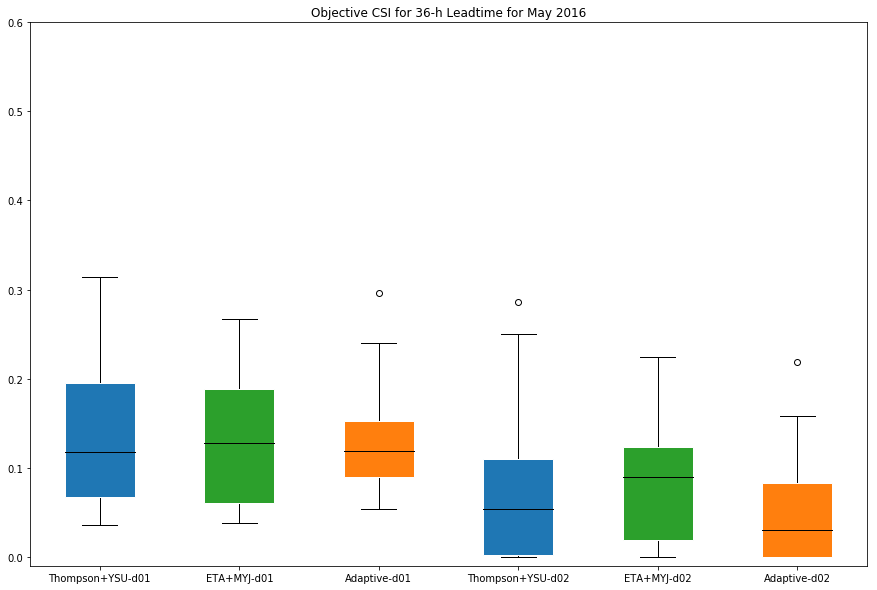

In [3]:
dates = list(pd.date_range(start='2016-05-02T12',
                     end='2016-05-31T12',
                     freq='1D'))
for missing in missing_dates:
    if missing in dates:
        dates.remove(missing)
members = ['control_thompson', 'control_ETA', 'adaptive_wrf']
for fhour in [12, 18, 24, 36]:
    csi_data = {}
    for domain in [1, 2]:
        for member in members:
            data = []
            for date in dates:
                valid = date + pd.Timedelta(hours=fhour)
                if domain == 1:
                    file = ('/lustre/work/twixtrom/adaptive_verif_best/'+member+'/'+date.strftime('%Y%m%d%H')+'/'+
                            str(domain)+'/'+str(fhour)+'/mode_'+str(fhour)+'0000L_'+valid.strftime('%Y%m%d')+'_'+
                            valid.strftime('%H')+'0000V_030000A_cts.txt')
                else:
                    file = ('/lustre/work/twixtrom/adaptive_verif_best/'+member+'/'+date.strftime('%Y%m%d%H')+'/'+
                            str(domain)+'/'+str(fhour)+'/mode_'+str(fhour)+'0000L_'+valid.strftime('%Y%m%d')+'_'+
                            valid.strftime('%H')+'0000V_010000A_cts.txt')
                try:
                    cts_file = pd.read_csv(file, delim_whitespace=True)
                    data.append(cts_file['CSI'][1])
                except FileNotFoundError:
                    data.append(np.nan)
            csi_data[member+' - Domain '+str(domain)] = np.array(data)

    labels = ['Thompson+YSU-d01', 'ETA+MYJ-d01', 'Adaptive-d01',
              'Thompson+YSU-d02', 'ETA+MYJ-d02', 'Adaptive-d02']
    dataframe = pd.DataFrame(data=csi_data)
    dataframe.columns = labels

    bp = dataframe.plot.box(figsize=(15,10), color={'medians': 'k', 'boxes': 'white', 'whiskers': 'k'}, return_type='dict',  patch_artist=True)
    colors = ['tab:blue', 'tab:green', 'tab:orange', 'tab:blue', 'tab:green', 'tab:orange']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    plt.title('Objective CSI for '+str(fhour)+'-h Leadtime for May 2016')
    plt.ylim(-0.01, 0.6)
    plt.show()

### CSI, January 2016

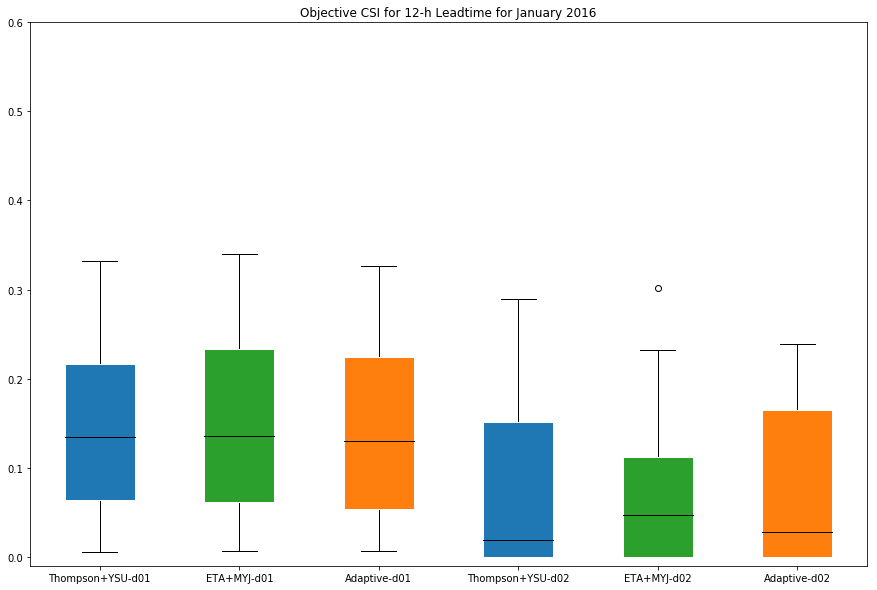

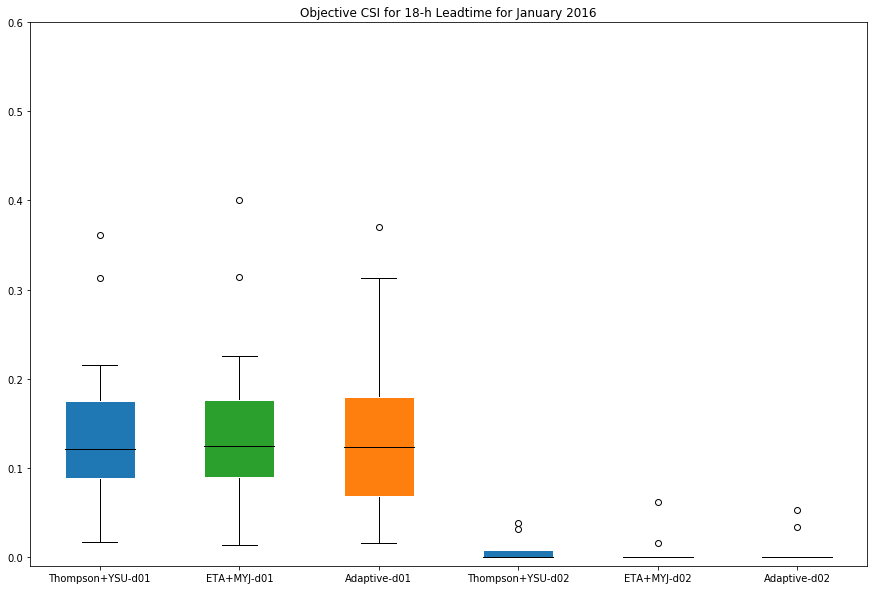

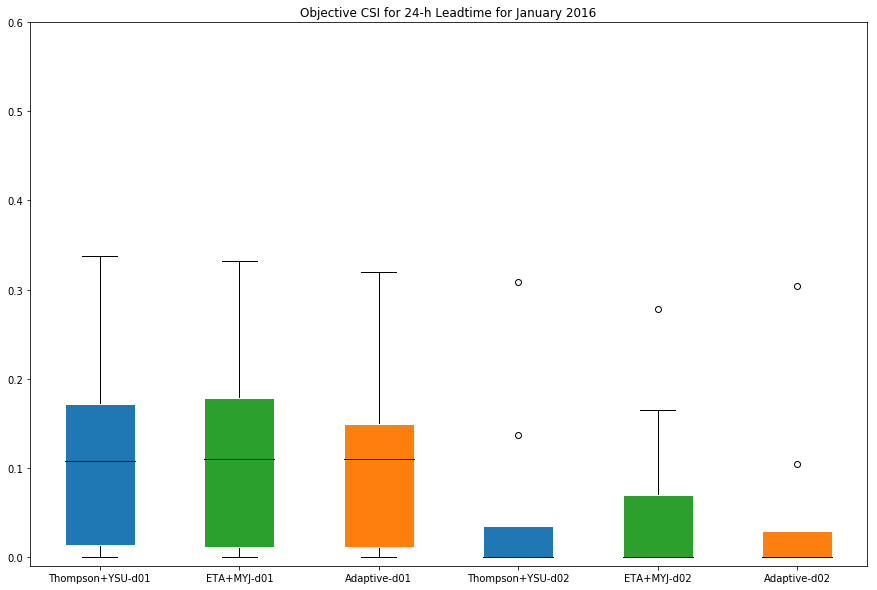

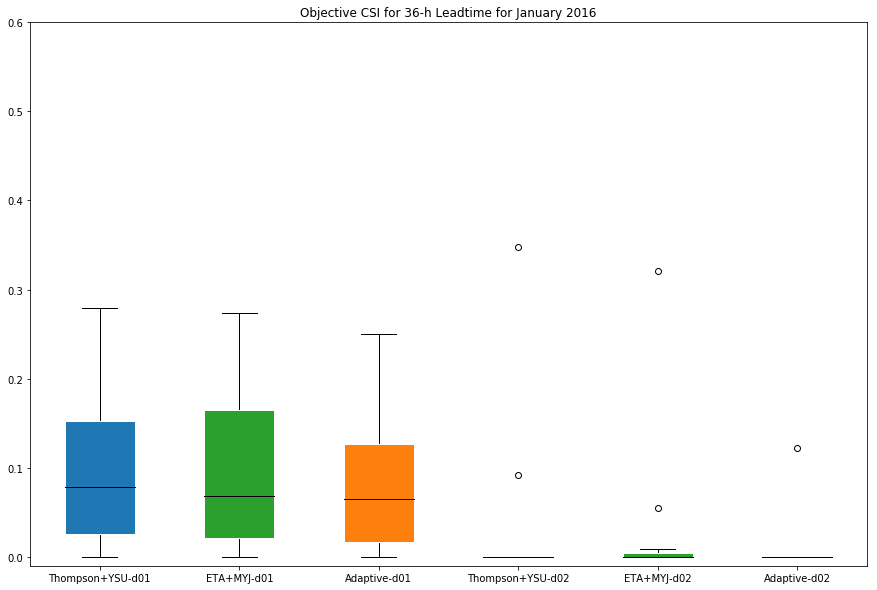

In [4]:
dates = list(pd.date_range(start='2016-01-02T12',
                     end='2016-01-31T12',
                     freq='1D'))
for missing in missing_dates:
    if missing in dates:
        dates.remove(missing)

members = ['control_thompson', 'control_ETA', 'adaptive_wrf']
for fhour in [12, 18, 24, 36]:
    csi_data = {}
    for domain in [1, 2]:
        for member in members:
            data = []
            for date in dates:
                valid = date + pd.Timedelta(hours=fhour)
                if domain == 1:
                    file = ('/lustre/work/twixtrom/adaptive_verif_best/'+member+'/'+date.strftime('%Y%m%d%H')+'/'+
                            str(domain)+'/'+str(fhour)+'/mode_'+str(fhour)+'0000L_'+valid.strftime('%Y%m%d')+'_'+
                            valid.strftime('%H')+'0000V_030000A_cts.txt')
                else:
                    file = ('/lustre/work/twixtrom/adaptive_verif_best/'+member+'/'+date.strftime('%Y%m%d%H')+'/'+
                            str(domain)+'/'+str(fhour)+'/mode_'+str(fhour)+'0000L_'+valid.strftime('%Y%m%d')+'_'+
                            valid.strftime('%H')+'0000V_010000A_cts.txt')
                try:
                    cts_file = pd.read_csv(file, delim_whitespace=True)
                    data.append(cts_file['CSI'][1])
                except FileNotFoundError:
                    data.append(np.nan)
            csi_data[member+' - Domain '+str(domain)] = np.array(data)

    labels = ['Thompson+YSU-d01', 'ETA+MYJ-d01', 'Adaptive-d01',
              'Thompson+YSU-d02', 'ETA+MYJ-d02', 'Adaptive-d02']
    dataframe = pd.DataFrame(data=csi_data)
    dataframe.columns = labels

    bp = dataframe.plot.box(figsize=(15,10), color={'medians': 'k', 'boxes': 'white', 'whiskers': 'k'}, return_type='dict',  patch_artist=True)
    colors = ['tab:blue', 'tab:green', 'tab:orange', 'tab:blue', 'tab:green', 'tab:orange']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    plt.title('Objective CSI for '+str(fhour)+'-h Leadtime for January 2016')
    plt.ylim(-0.01, 0.6)
    plt.show()

### CSI, July 2016

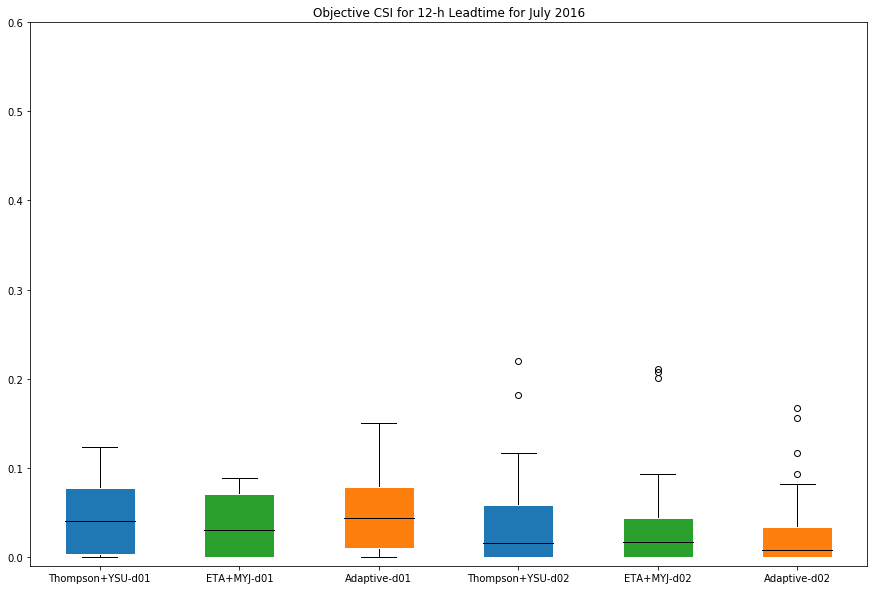

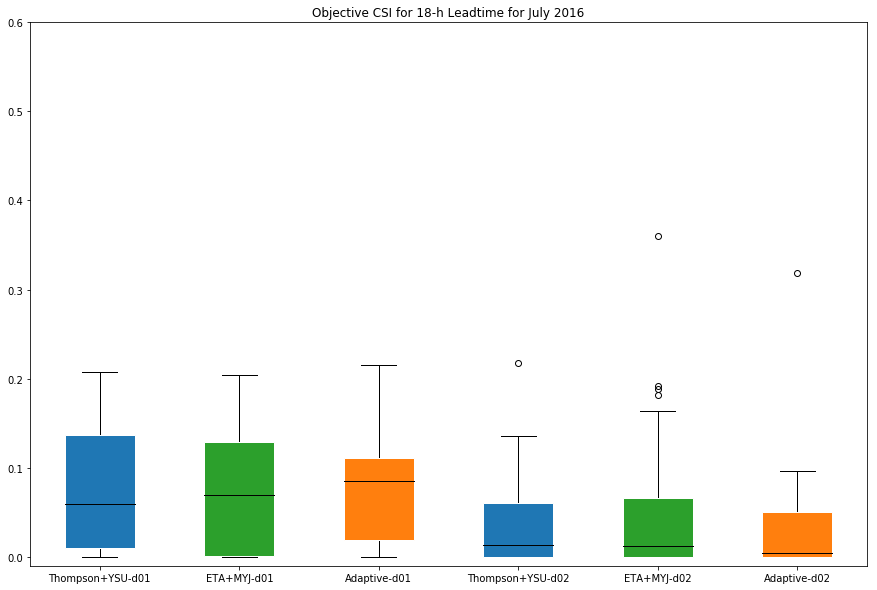

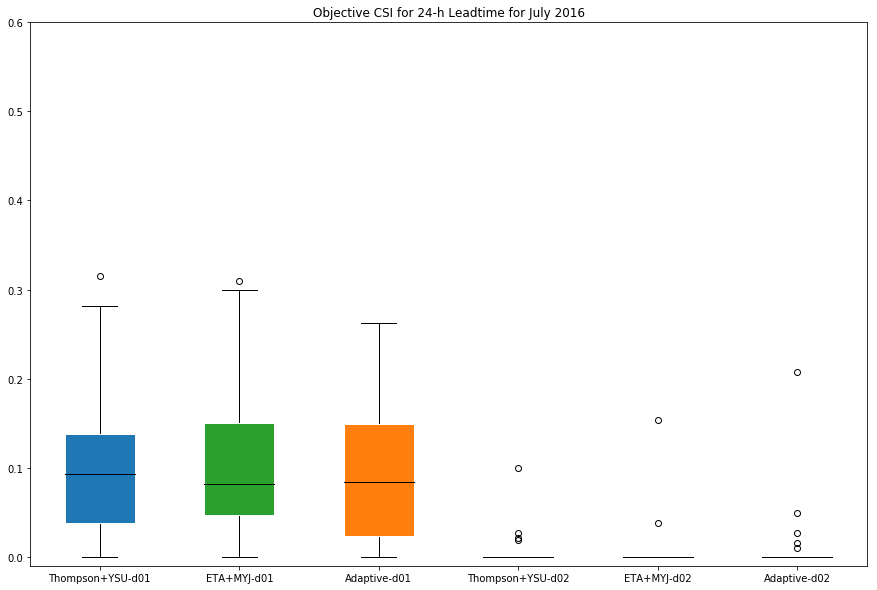

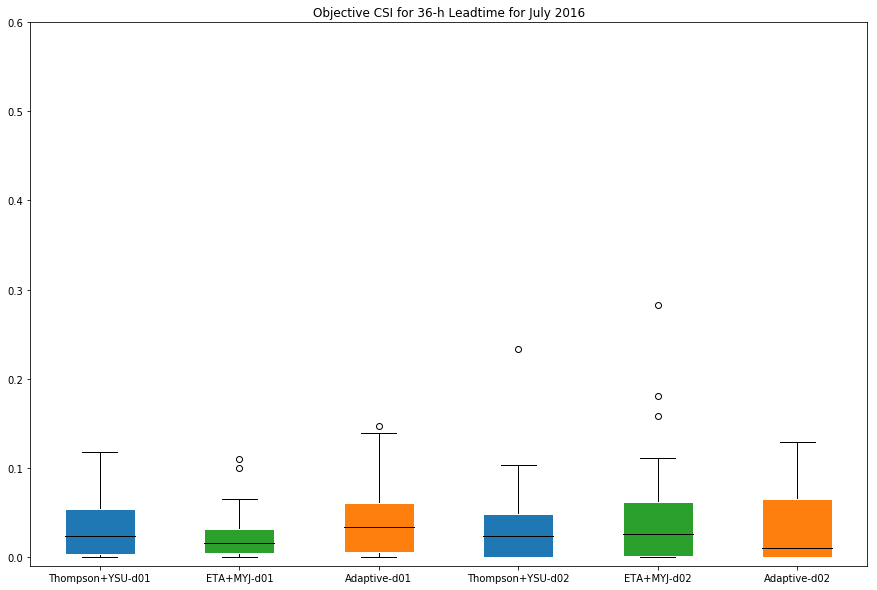

In [5]:
dates = list(pd.date_range(start='2016-07-02T12',
                     end='2016-07-31T12',
                     freq='1D'))
for missing in missing_dates:
    if missing in dates:
        dates.remove(missing)

members = ['control_thompson', 'control_ETA', 'adaptive_wrf']
for fhour in [12, 18, 24, 36]:
    csi_data = {}
    for domain in [1, 2]:
        for member in members:
            data = []
            for date in dates:
                valid = date + pd.Timedelta(hours=fhour)
                if domain == 1:
                    file = ('/lustre/work/twixtrom/adaptive_verif_best/'+member+'/'+date.strftime('%Y%m%d%H')+'/'+
                            str(domain)+'/'+str(fhour)+'/mode_'+str(fhour)+'0000L_'+valid.strftime('%Y%m%d')+'_'+
                            valid.strftime('%H')+'0000V_030000A_cts.txt')
                else:
                    file = ('/lustre/work/twixtrom/adaptive_verif_best/'+member+'/'+date.strftime('%Y%m%d%H')+'/'+
                            str(domain)+'/'+str(fhour)+'/mode_'+str(fhour)+'0000L_'+valid.strftime('%Y%m%d')+'_'+
                            valid.strftime('%H')+'0000V_010000A_cts.txt')
                try:
                    cts_file = pd.read_csv(file, delim_whitespace=True)
                    data.append(cts_file['CSI'][1])
                except FileNotFoundError:
                    data.append(np.nan)
            csi_data[member+' - Domain '+str(domain)] = np.array(data)

    labels = ['Thompson+YSU-d01', 'ETA+MYJ-d01', 'Adaptive-d01',
              'Thompson+YSU-d02', 'ETA+MYJ-d02', 'Adaptive-d02']
    dataframe = pd.DataFrame(data=csi_data)
    dataframe.columns = labels

    bp = dataframe.plot.box(figsize=(15,10), color={'medians': 'k', 'boxes': 'white', 'whiskers': 'k'}, return_type='dict',  patch_artist=True)
    colors = ['tab:blue', 'tab:green', 'tab:orange', 'tab:blue', 'tab:green', 'tab:orange']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    plt.title('Objective CSI for '+str(fhour)+'-h Leadtime for July 2016')
    plt.ylim(-0.01, 0.6)
    plt.show()

### CSI, FBIAS, HSS, FAR, All Cases

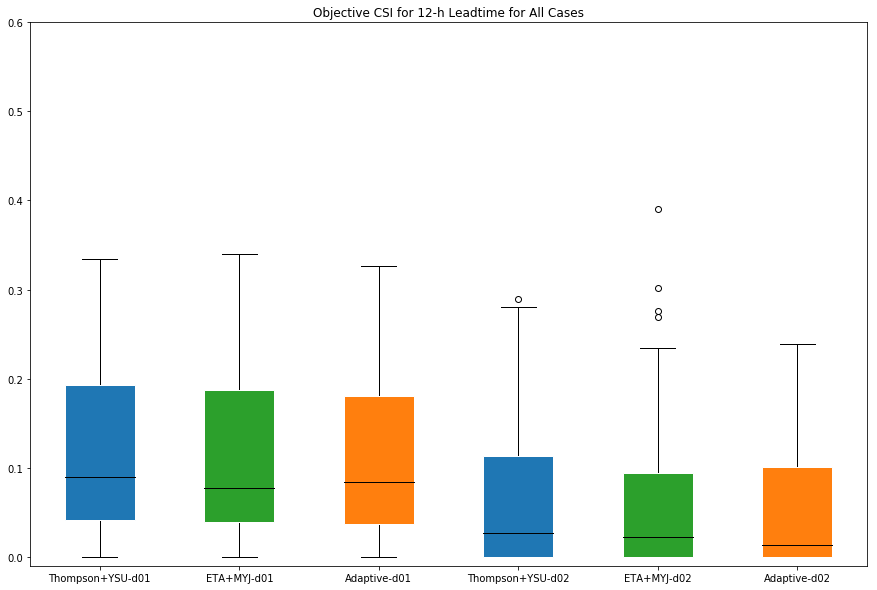

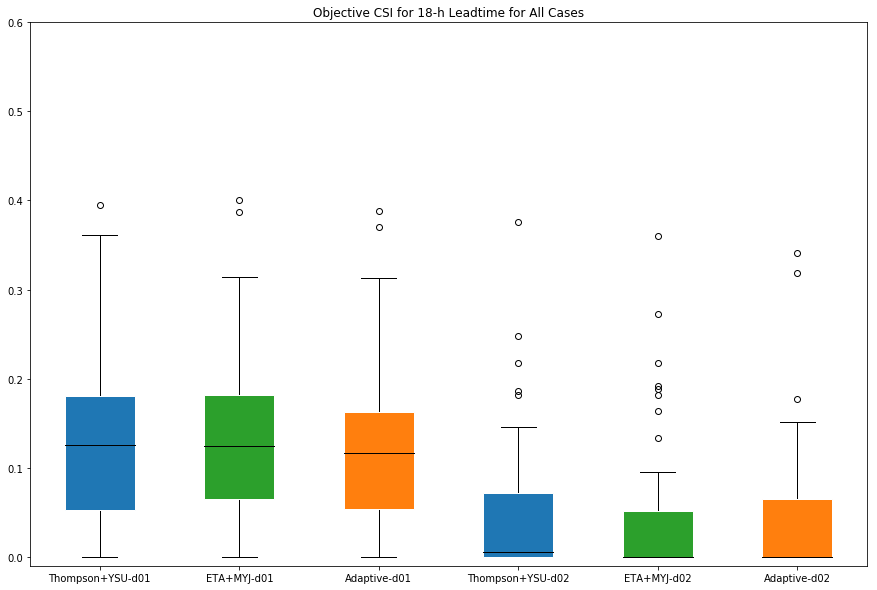

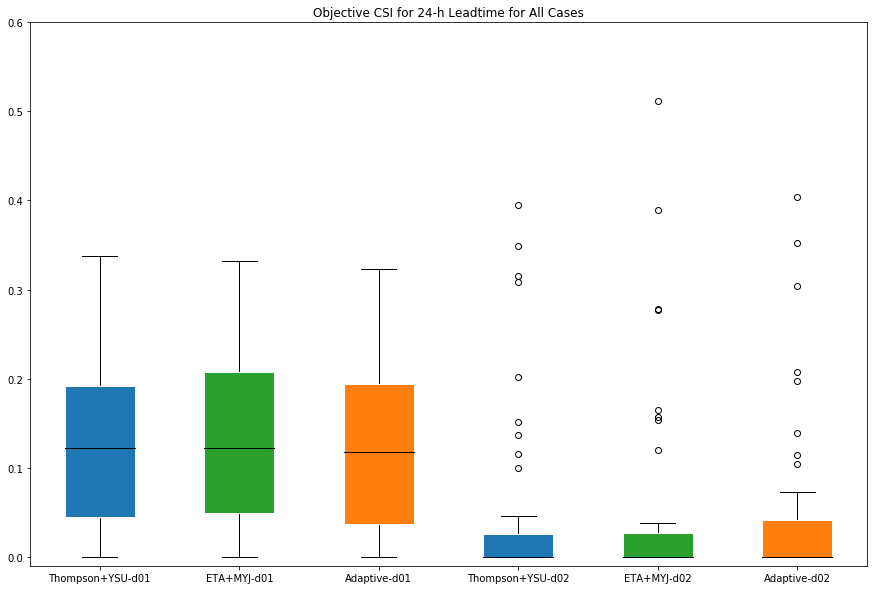

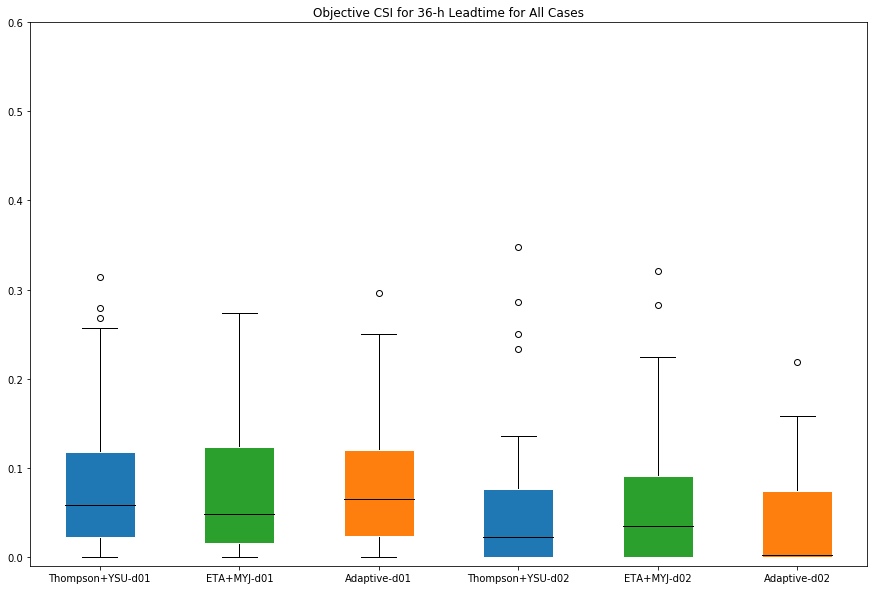

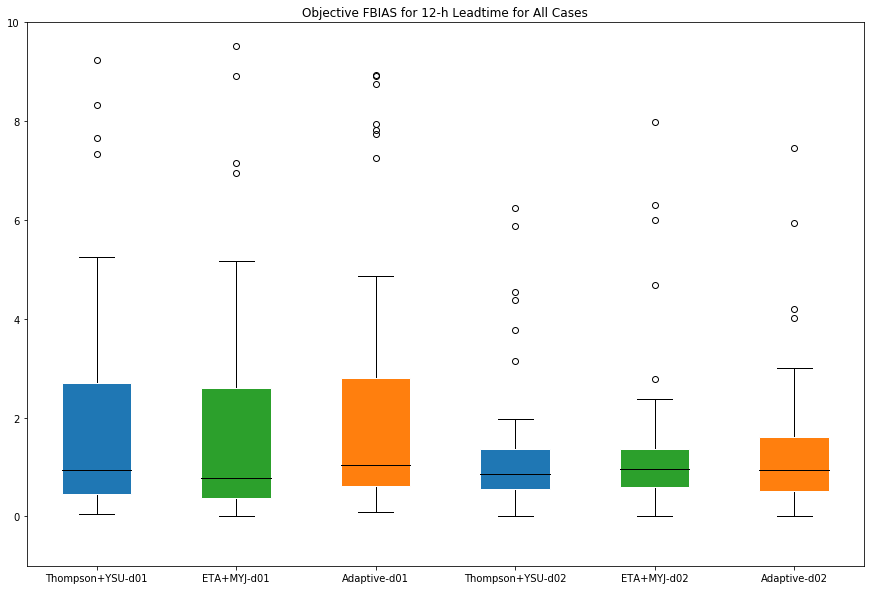

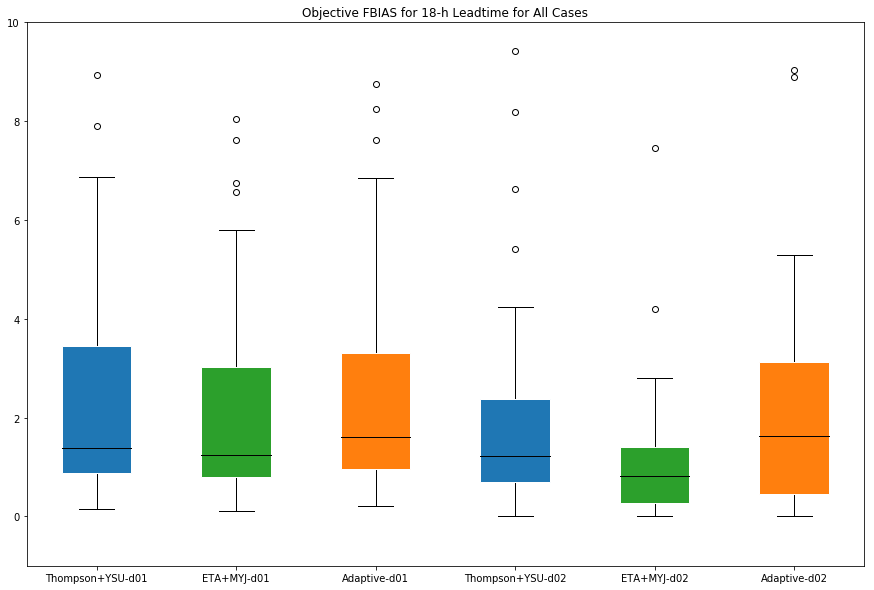

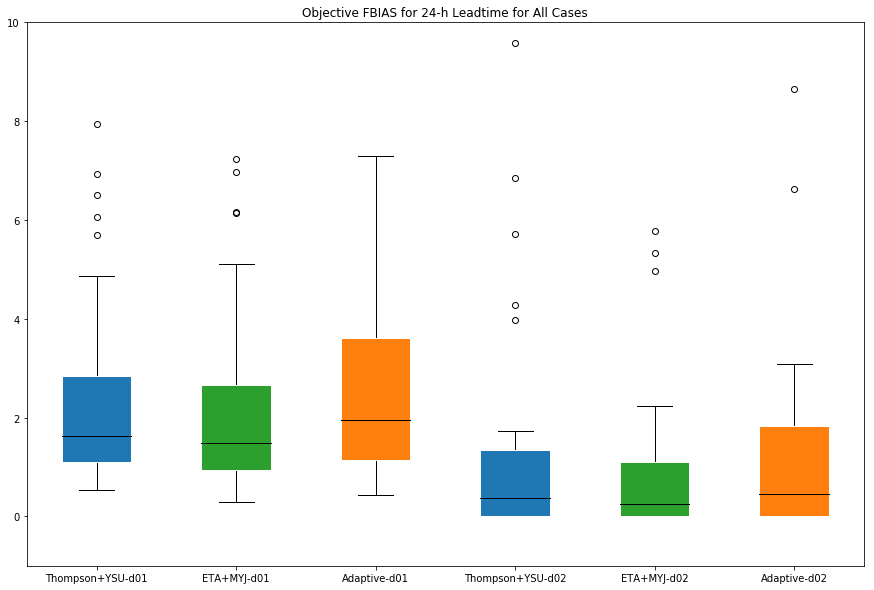

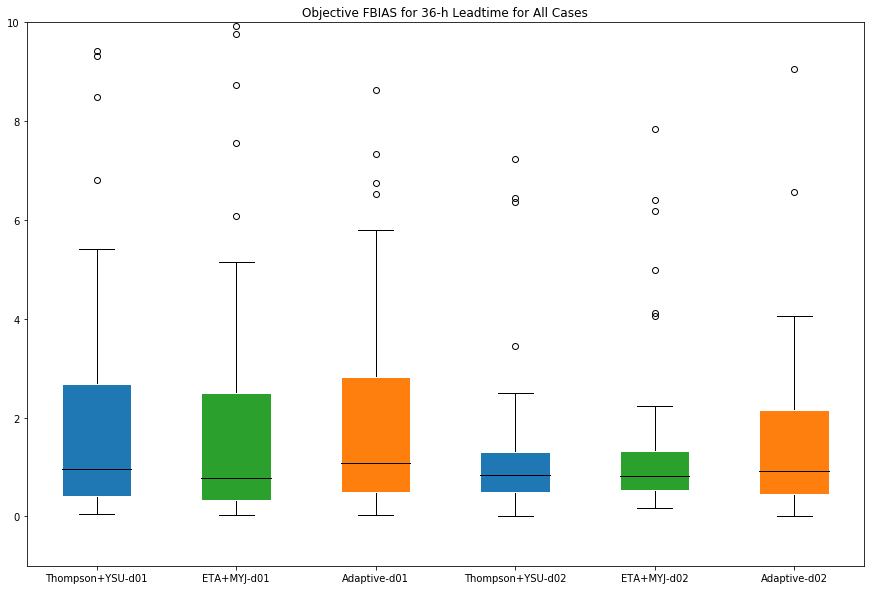

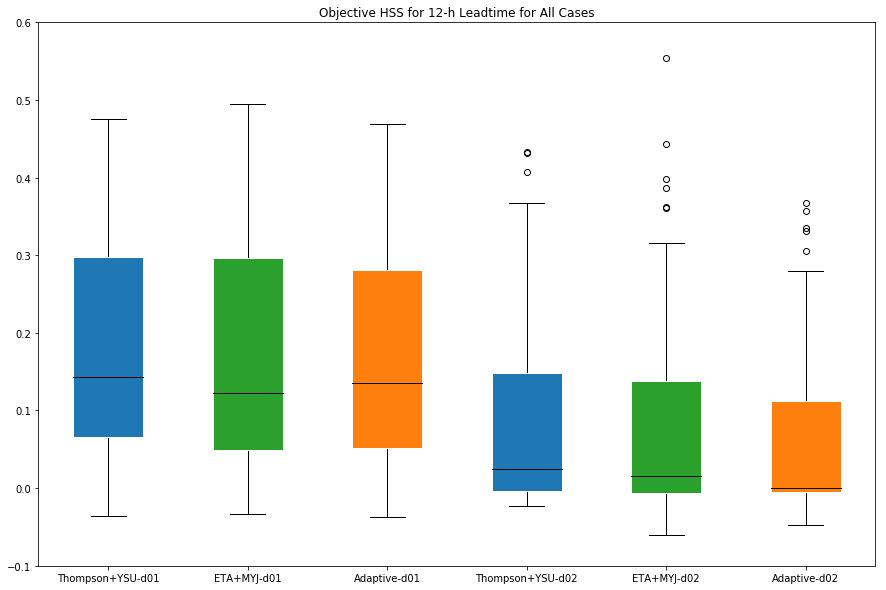

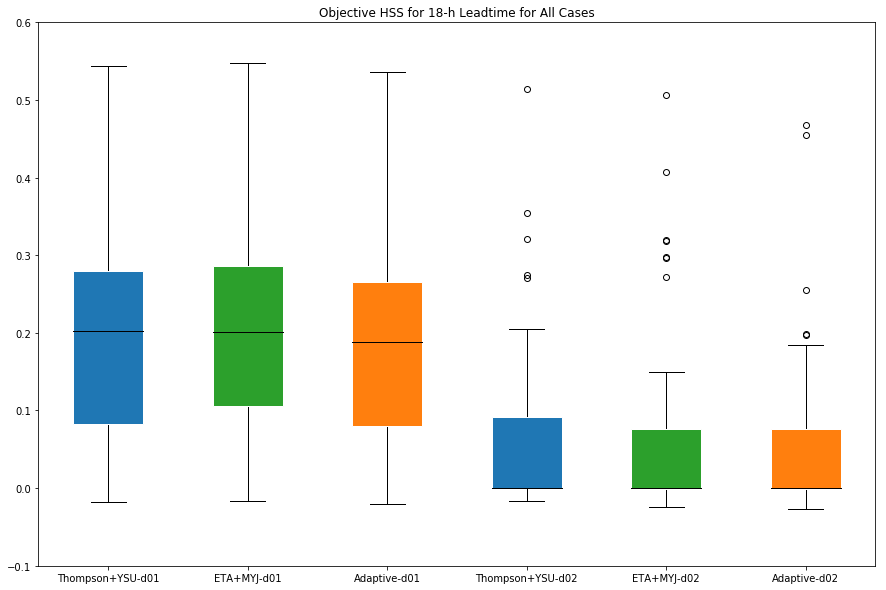

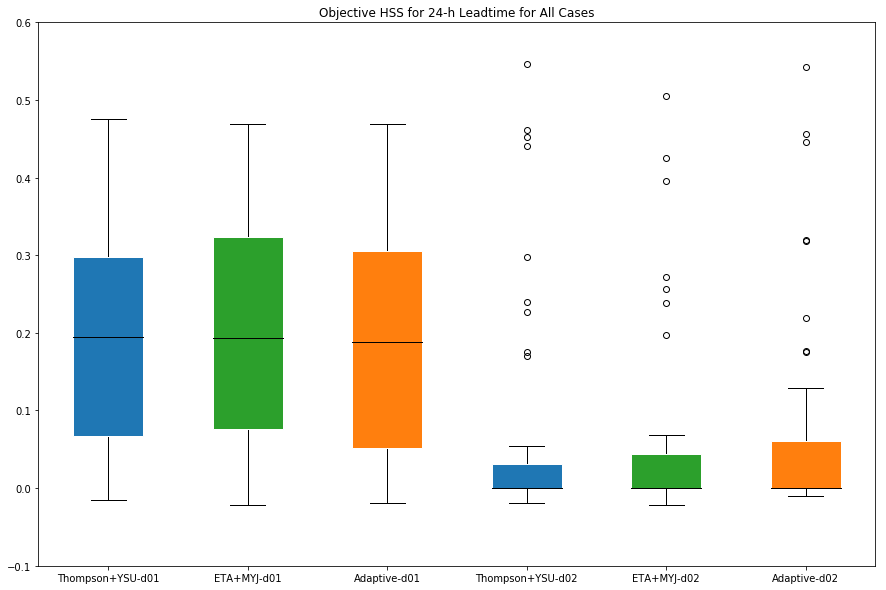

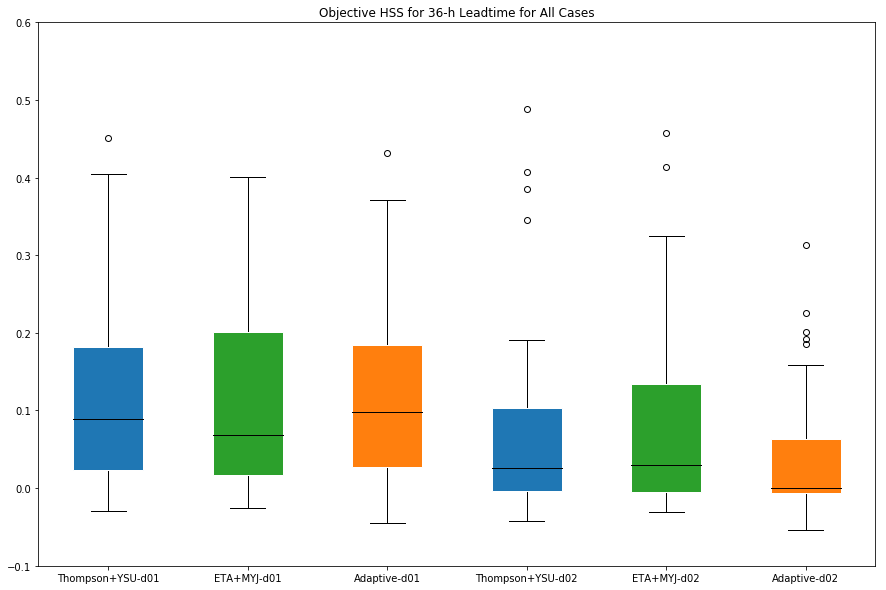

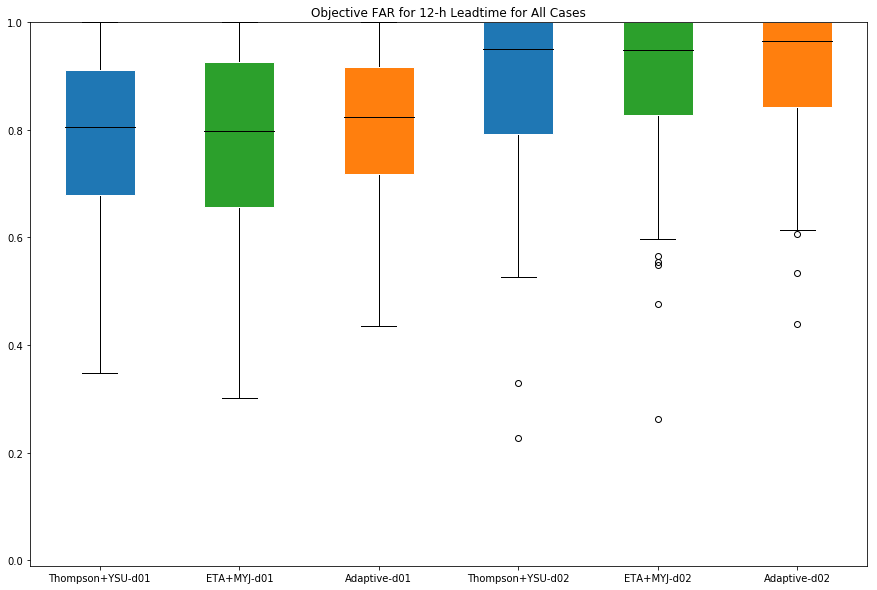

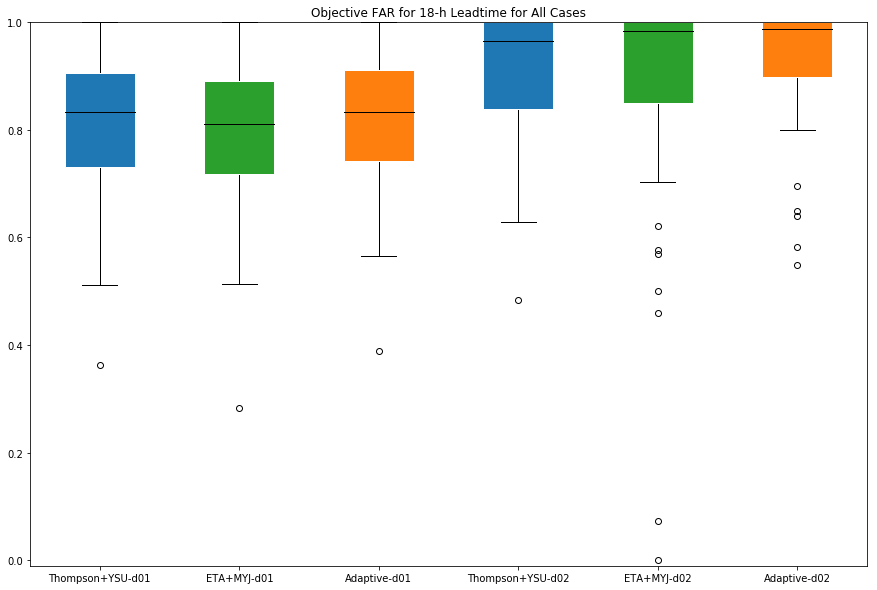

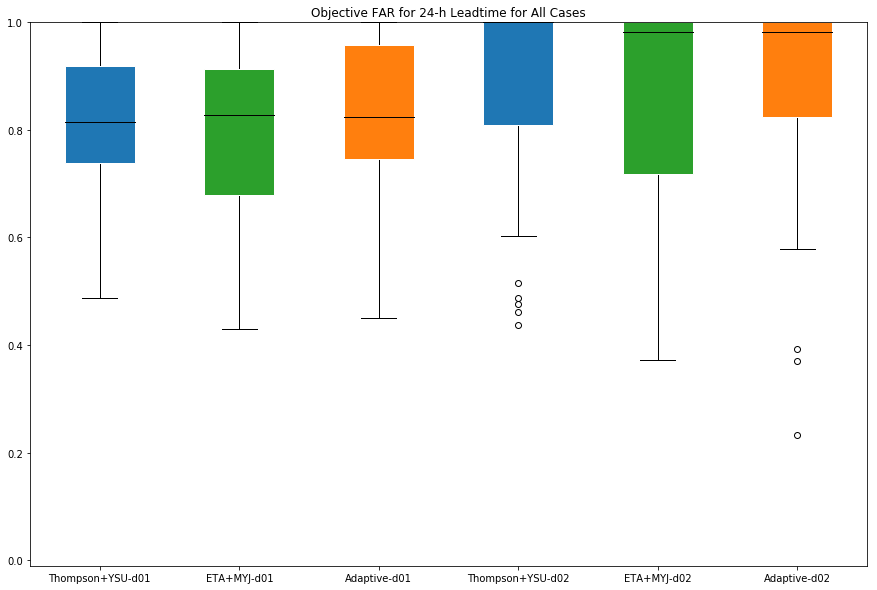

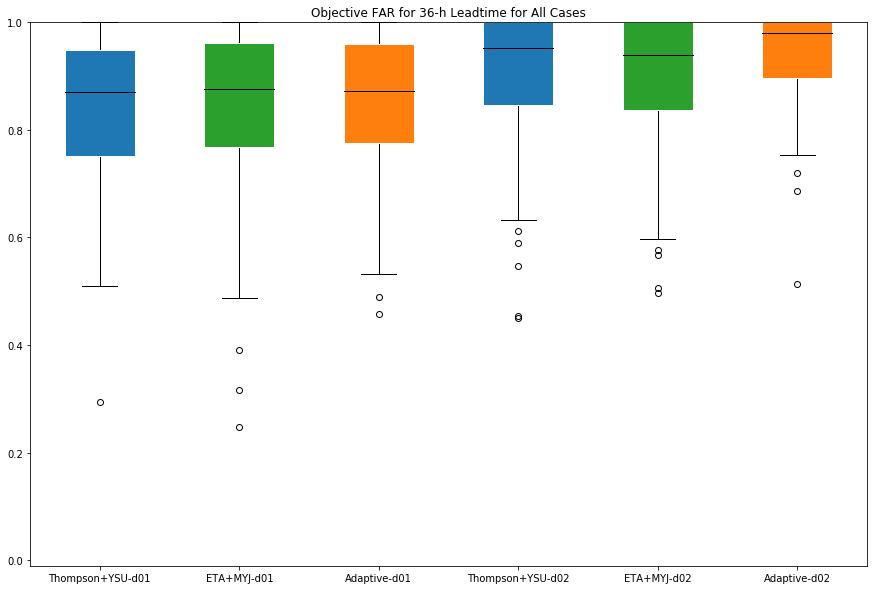

In [6]:
all_dates = []
for date in pd.date_range(start='2016-01-02T12', end='2016-01-31T12', freq='1D'):
    all_dates.append(date)
for date in pd.date_range(start='2016-05-02T12', end='2016-05-31T12', freq='1D'):
    all_dates.append(date)
for date in pd.date_range(start='2016-07-02T12', end='2016-07-31T12', freq='1D'):
    all_dates.append(date)
    
for missing in missing_dates:
    if missing in all_dates:
        all_dates.remove(missing)

members = ['control_thompson', 'control_ETA', 'adaptive_wrf']
for index in ['CSI', 'FBIAS', 'HSS', 'FAR']:
    for fhour in [12, 18, 24, 36]:
        csi_data = {}
        for domain in [1, 2]:
            for member in members:
                data = []
                for date in all_dates:
                    valid = date + pd.Timedelta(hours=fhour)
                    if domain == 1:
                        file = ('/lustre/work/twixtrom/adaptive_verif_best/'+member+'/'+date.strftime('%Y%m%d%H')+'/'+
                                str(domain)+'/'+str(fhour)+'/mode_'+str(fhour)+'0000L_'+valid.strftime('%Y%m%d')+'_'+
                                valid.strftime('%H')+'0000V_030000A_cts.txt')
                    else:
                        file = ('/lustre/work/twixtrom/adaptive_verif_best/'+member+'/'+date.strftime('%Y%m%d%H')+'/'+
                                str(domain)+'/'+str(fhour)+'/mode_'+str(fhour)+'0000L_'+valid.strftime('%Y%m%d')+'_'+
                                valid.strftime('%H')+'0000V_010000A_cts.txt')
                    try:
                        cts_file = pd.read_csv(file, delim_whitespace=True)
                        data.append(cts_file[index][1])
                    except FileNotFoundError:
                        data.append(np.nan)
                csi_data[member+' - Domain '+str(domain)] = np.array(data)

        labels = ['Thompson+YSU-d01', 'ETA+MYJ-d01', 'Adaptive-d01',
                  'Thompson+YSU-d02', 'ETA+MYJ-d02', 'Adaptive-d02']
        dataframe = pd.DataFrame(data=csi_data)
        dataframe.columns = labels

        bp = dataframe.plot.box(figsize=(15,10), color={'medians': 'k', 'boxes': 'white', 'whiskers': 'k'}, return_type='dict',  patch_artist=True)
        colors = ['tab:blue', 'tab:green', 'tab:orange', 'tab:blue', 'tab:green', 'tab:orange']
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
        plt.title('Objective '+index+' for '+str(fhour)+'-h Leadtime for All Cases')
        if index == 'CSI':
            plt.ylim(-0.01, 0.6)
        elif index == 'FAR':
            plt.ylim(-0.01, 1)
        elif index == 'HSS':
            plt.ylim(-0.1, 0.6)
        elif index == 'FBIAS':
            plt.ylim(-1, 10)
        plt.show()

### Centoid Distance

#### All Cases

/home/twixtrom/miniconda3/envs/analogue/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: Mean of empty slice.
/home/twixtrom/miniconda3/envs/analogue/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


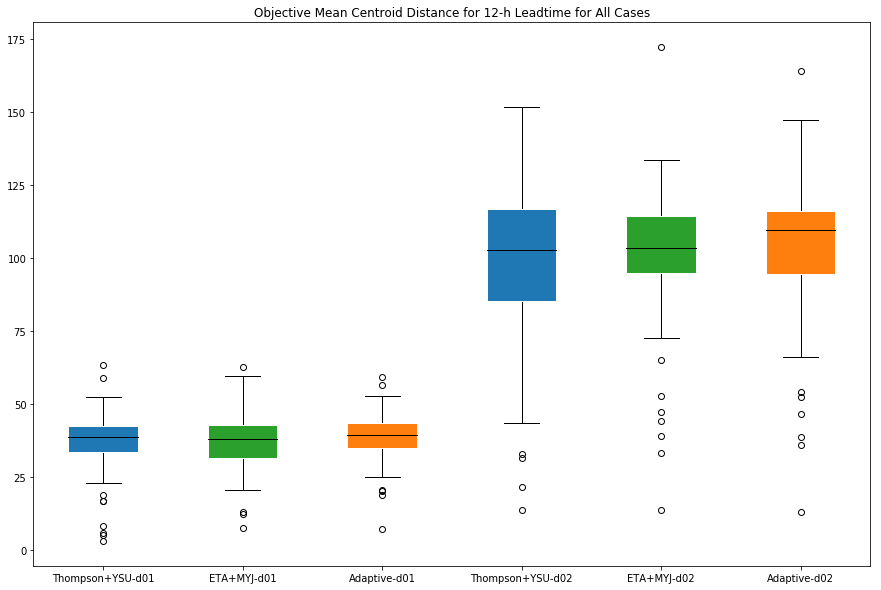

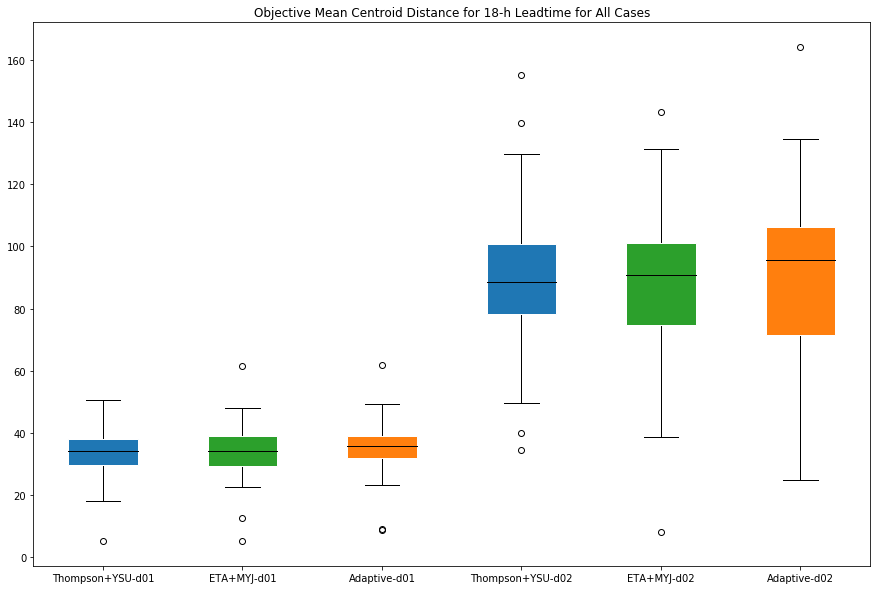

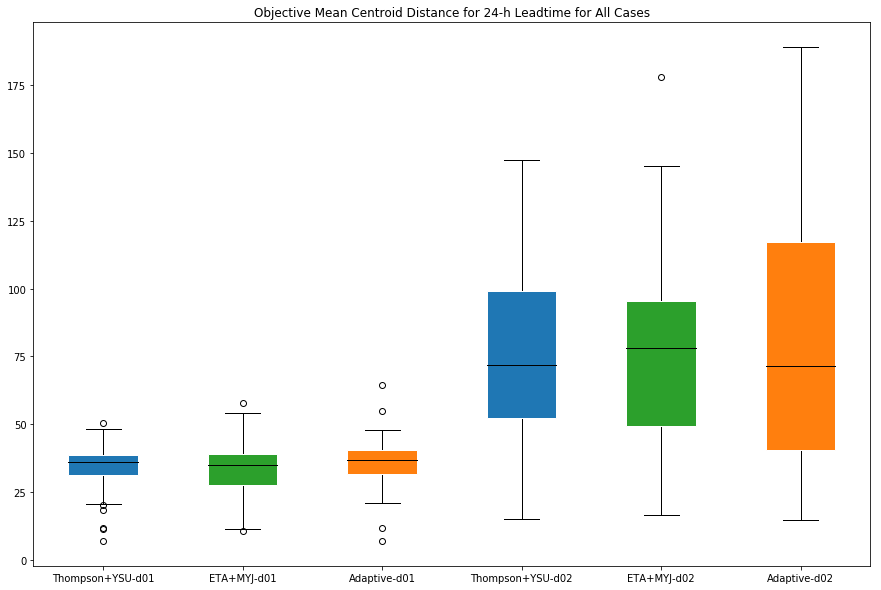

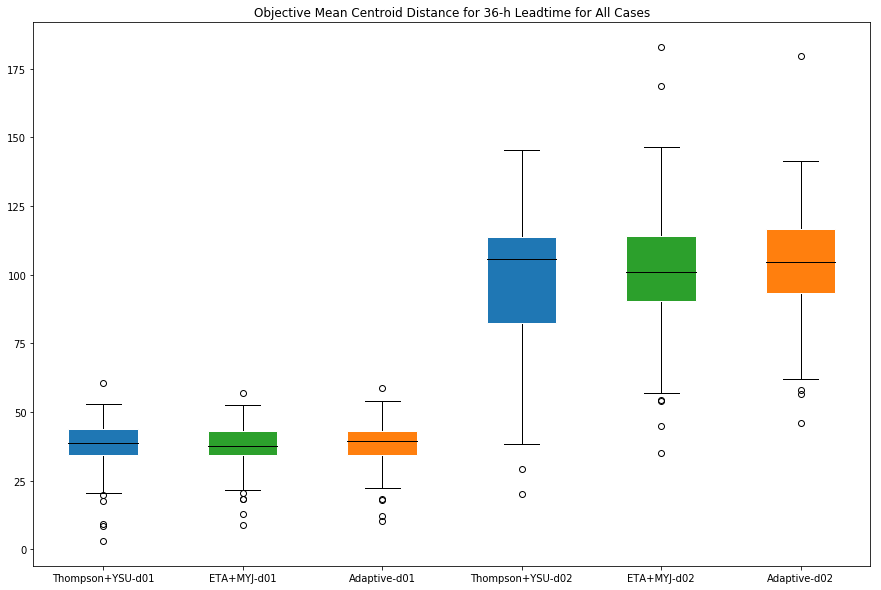

In [7]:
all_dates = []
for date in pd.date_range(start='2016-01-02T12', end='2016-01-31T12', freq='1D'):
    all_dates.append(date)
for date in pd.date_range(start='2016-05-02T12', end='2016-05-31T12', freq='1D'):
    all_dates.append(date)
for date in pd.date_range(start='2016-07-02T12', end='2016-07-31T12', freq='1D'):
    all_dates.append(date)
    
for missing in missing_dates:
    if missing in all_dates:
        all_dates.remove(missing)

members = ['control_thompson', 'control_ETA', 'adaptive_wrf']
for fhour in [12, 18, 24, 36]:
    cen_data = {}
    for domain in [1, 2]:
        for member in members:
            data = []
            for date in all_dates:
                valid = date + pd.Timedelta(hours=fhour)
                if domain == 1:
                    file = ('/lustre/work/twixtrom/adaptive_verif_best/'+member+'/'+date.strftime('%Y%m%d%H')+'/'+
                            str(domain)+'/'+str(fhour)+'/mode_'+str(fhour)+'0000L_'+valid.strftime('%Y%m%d')+'_'+
                            valid.strftime('%H')+'0000V_030000A_obj.txt')
                else:
                    file = ('/lustre/work/twixtrom/adaptive_verif_best/'+member+'/'+date.strftime('%Y%m%d%H')+'/'+
                            str(domain)+'/'+str(fhour)+'/mode_'+str(fhour)+'0000L_'+valid.strftime('%Y%m%d')+'_'+
                            valid.strftime('%H')+'0000V_010000A_obj.txt')
                try:
                    obj_file = pd.read_csv(file, delim_whitespace=True)
                    dist = []
                    for i in range(obj_file['OBJECT_ID'].shape[0]):
                        if re.match(r'F..._O...', obj_file['OBJECT_ID'][i]):
                            dist.append(obj_file['CENTROID_DIST'][i])
                    try:
                        data.append(np.array(dist).mean())
                    except RuntimeWarning:
                        data.append(np.nan)
                except FileNotFoundError:
                    data.append(np.nan)
            cen_data[member+' - Domain '+str(domain)] = np.array(data)

    labels = ['Thompson+YSU-d01', 'ETA+MYJ-d01', 'Adaptive-d01',
              'Thompson+YSU-d02', 'ETA+MYJ-d02', 'Adaptive-d02']
    dataframe = pd.DataFrame(data=cen_data)
    dataframe.columns = labels

    bp = dataframe.plot.box(figsize=(15,10), color={'medians': 'k', 'boxes': 'white', 'whiskers': 'k'}, return_type='dict',  patch_artist=True)
    colors = ['tab:blue', 'tab:green', 'tab:orange', 'tab:blue', 'tab:green', 'tab:orange']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    plt.title('Objective Mean Centroid Distance for '+str(fhour)+'-h Leadtime for All Cases')
    plt.show()

#### All Cases, Clustered Objects

/home/twixtrom/miniconda3/envs/analogue/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: Mean of empty slice.


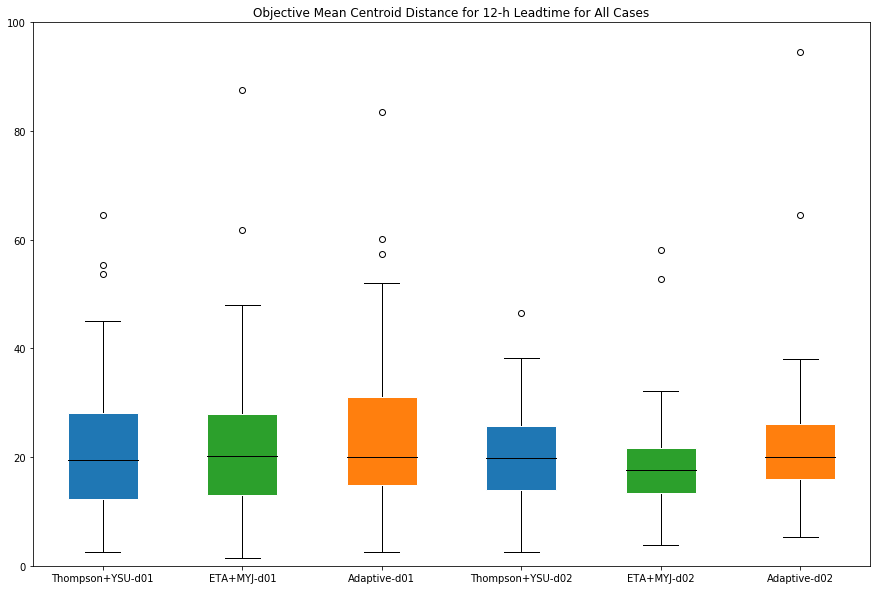

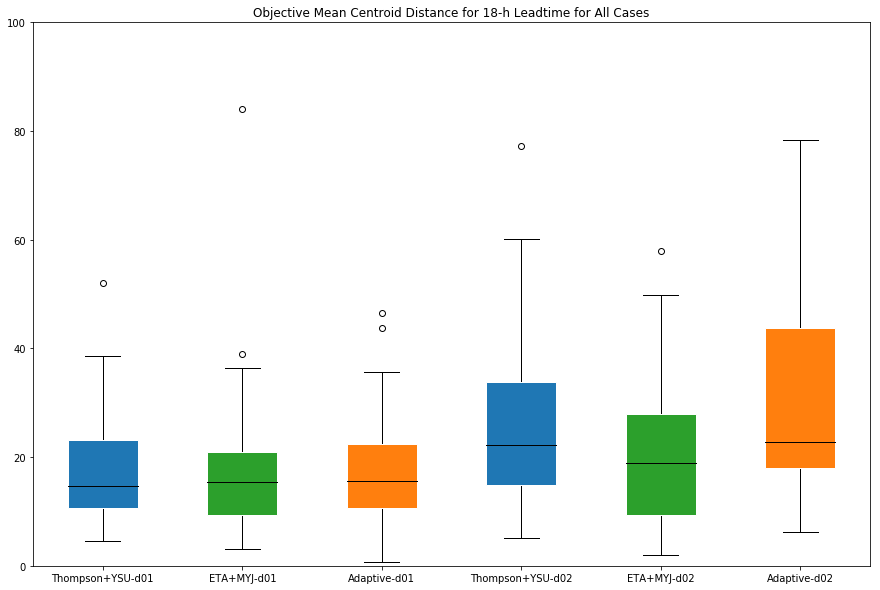

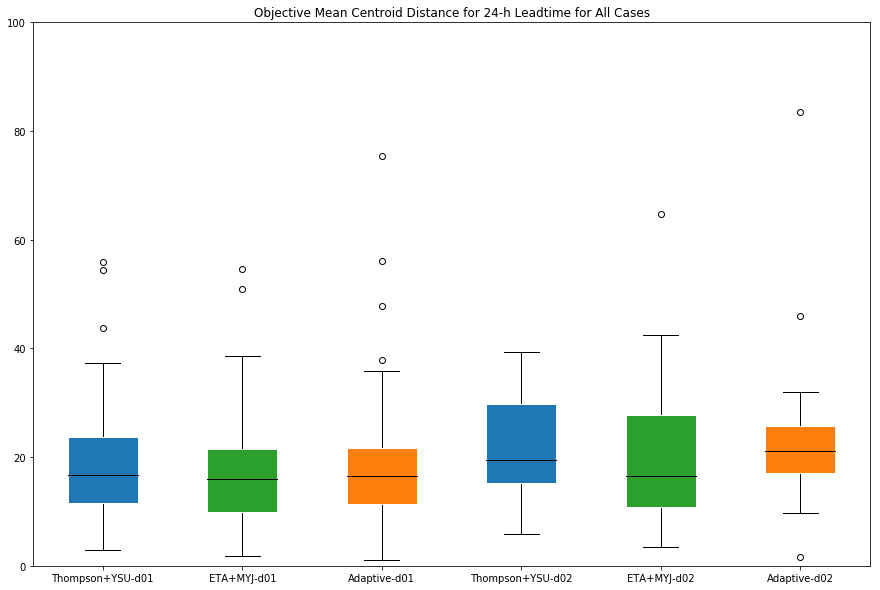

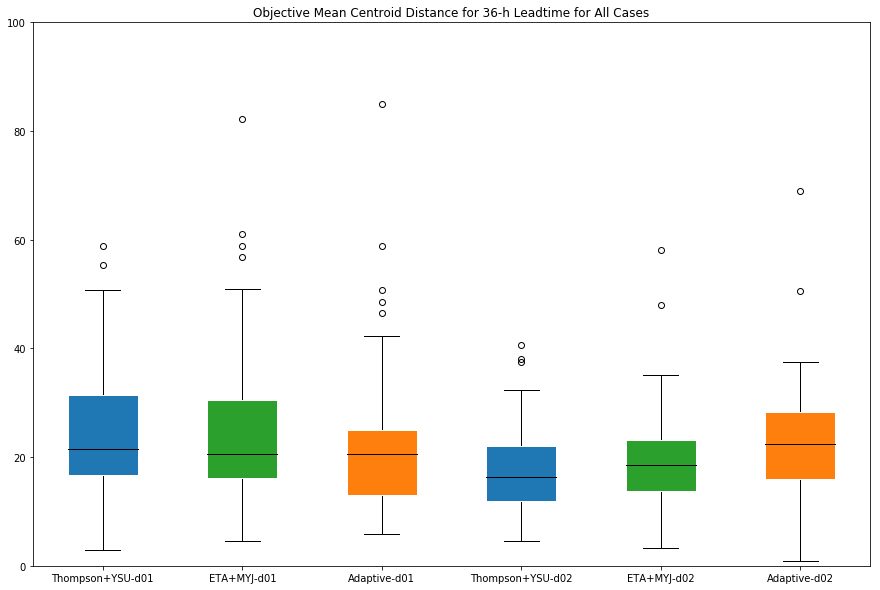

In [8]:
all_dates = []
for date in pd.date_range(start='2016-01-02T12', end='2016-01-31T12', freq='1D'):
    all_dates.append(date)
for date in pd.date_range(start='2016-05-02T12', end='2016-05-31T12', freq='1D'):
    all_dates.append(date)
for date in pd.date_range(start='2016-07-02T12', end='2016-07-31T12', freq='1D'):
    all_dates.append(date)
    
for missing in missing_dates:
    if missing in all_dates:
        all_dates.remove(missing)

members = ['control_thompson', 'control_ETA', 'adaptive_wrf']
for fhour in [12, 18, 24, 36]:
    cen_data = {}
    for domain in [1, 2]:
        for member in members:
            data = []
            for date in all_dates:
                valid = date + pd.Timedelta(hours=fhour)
                if domain == 1:
                    file = ('/lustre/work/twixtrom/adaptive_verif_best/'+member+'/'+date.strftime('%Y%m%d%H')+'/'+
                            str(domain)+'/'+str(fhour)+'/mode_'+str(fhour)+'0000L_'+valid.strftime('%Y%m%d')+'_'+
                            valid.strftime('%H')+'0000V_030000A_obj.txt')
                else:
                    file = ('/lustre/work/twixtrom/adaptive_verif_best/'+member+'/'+date.strftime('%Y%m%d%H')+'/'+
                            str(domain)+'/'+str(fhour)+'/mode_'+str(fhour)+'0000L_'+valid.strftime('%Y%m%d')+'_'+
                            valid.strftime('%H')+'0000V_010000A_obj.txt')
                try:
                    obj_file = pd.read_csv(file, delim_whitespace=True)
                    dist = []
                    for i in range(obj_file['OBJECT_ID'].shape[0]):
                        if re.match(r'CF..._CO...', obj_file['OBJECT_ID'][i]):
                            dist.append(obj_file['CENTROID_DIST'][i])
                    try:
                        data.append(np.array(dist).mean())
                    except RuntimeWarning:
                        data.append(np.nan)
                except FileNotFoundError:
                    data.append(np.nan)
            cen_data[member+' - Domain '+str(domain)] = np.array(data)

    labels = ['Thompson+YSU-d01', 'ETA+MYJ-d01', 'Adaptive-d01',
              'Thompson+YSU-d02', 'ETA+MYJ-d02', 'Adaptive-d02']
    dataframe = pd.DataFrame(data=cen_data)
    dataframe.columns = labels

    bp = dataframe.plot.box(figsize=(15,10), color={'medians': 'k', 'boxes': 'white', 'whiskers': 'k'}, return_type='dict',  patch_artist=True)
    colors = ['tab:blue', 'tab:green', 'tab:orange', 'tab:blue', 'tab:green', 'tab:orange']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    plt.title('Objective Mean Centroid Distance for '+str(fhour)+'-h Leadtime for All Cases')
    plt.ylim(0, 100)
    plt.show()

#### January Cases, Clustered Objects

/home/twixtrom/miniconda3/envs/analogue/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: Mean of empty slice.


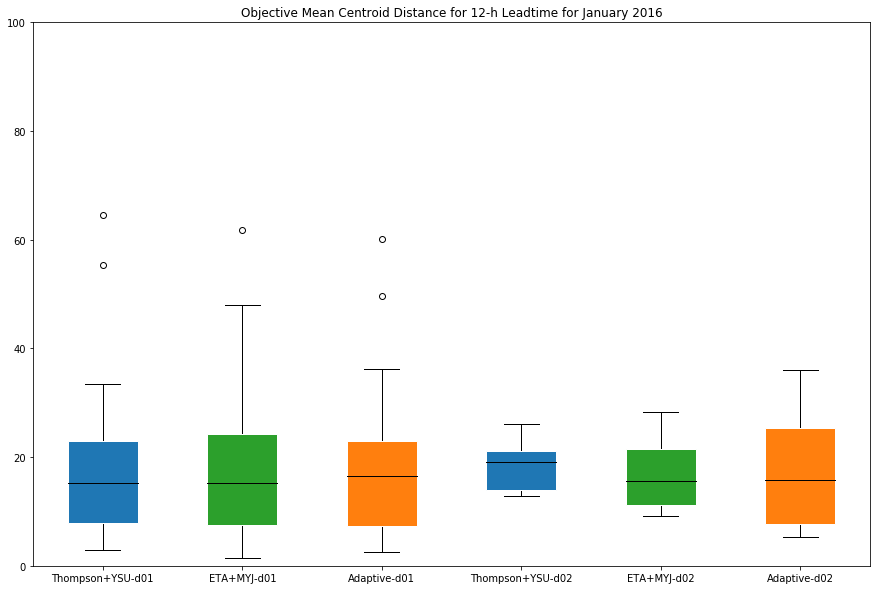

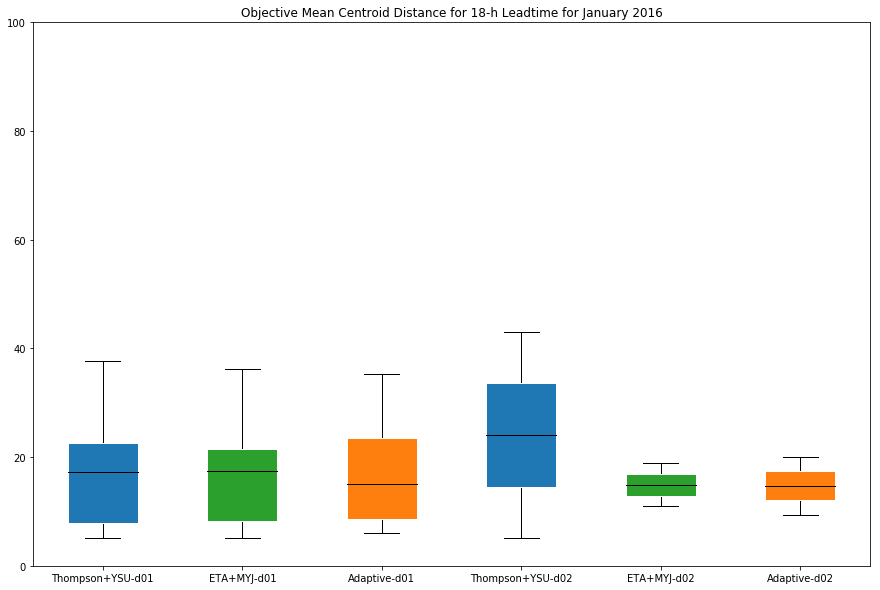

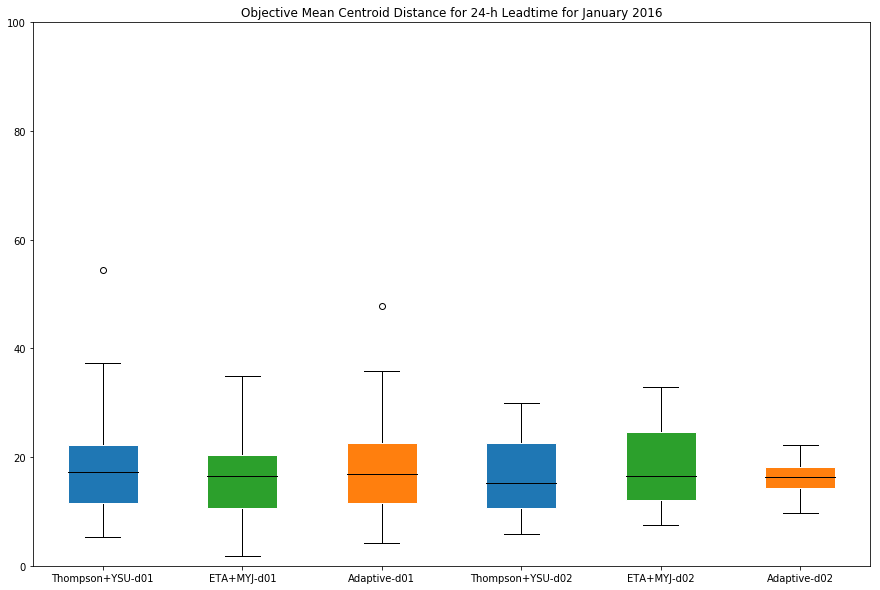

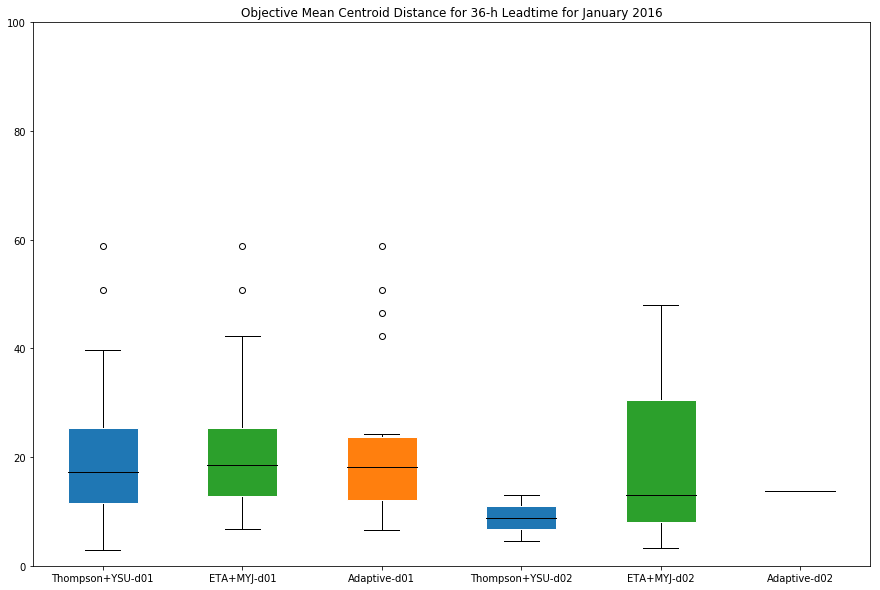

In [9]:
dates = list(pd.date_range(start='2016-01-02T12',
                     end='2016-01-31T12',
                     freq='1D'))
for missing in missing_dates:
    if missing in dates:
        dates.remove(missing)

members = ['control_thompson', 'control_ETA', 'adaptive_wrf']
for fhour in [12, 18, 24, 36]:
    cen_data = {}
    for domain in [1, 2]:
        for member in members:
            data = []
            for date in dates:
                valid = date + pd.Timedelta(hours=fhour)
                if domain == 1:
                    file = ('/lustre/work/twixtrom/adaptive_verif_best/'+member+'/'+date.strftime('%Y%m%d%H')+'/'+
                            str(domain)+'/'+str(fhour)+'/mode_'+str(fhour)+'0000L_'+valid.strftime('%Y%m%d')+'_'+
                            valid.strftime('%H')+'0000V_030000A_obj.txt')
                else:
                    file = ('/lustre/work/twixtrom/adaptive_verif_best/'+member+'/'+date.strftime('%Y%m%d%H')+'/'+
                            str(domain)+'/'+str(fhour)+'/mode_'+str(fhour)+'0000L_'+valid.strftime('%Y%m%d')+'_'+
                            valid.strftime('%H')+'0000V_010000A_obj.txt')
                try:
                    obj_file = pd.read_csv(file, delim_whitespace=True)
                    dist = []
                    for i in range(obj_file['OBJECT_ID'].shape[0]):
                        if re.match(r'CF..._CO...', obj_file['OBJECT_ID'][i]):
                            dist.append(obj_file['CENTROID_DIST'][i])
                    try:
                        data.append(np.array(dist).mean())
                    except RuntimeWarning:
                        data.append(np.nan)
                except FileNotFoundError:
                    data.append(np.nan)
            cen_data[member+' - Domain '+str(domain)] = np.array(data)

    labels = ['Thompson+YSU-d01', 'ETA+MYJ-d01', 'Adaptive-d01',
              'Thompson+YSU-d02', 'ETA+MYJ-d02', 'Adaptive-d02']
    dataframe = pd.DataFrame(data=cen_data)
    dataframe.columns = labels

    bp = dataframe.plot.box(figsize=(15,10), color={'medians': 'k', 'boxes': 'white', 'whiskers': 'k'}, return_type='dict',  patch_artist=True)
    colors = ['tab:blue', 'tab:green', 'tab:orange', 'tab:blue', 'tab:green', 'tab:orange']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    plt.title('Objective Mean Centroid Distance for '+str(fhour)+'-h Leadtime for January 2016')
    plt.ylim(0, 100)
    plt.show()

#### May Cases, Clustered Objects

/home/twixtrom/miniconda3/envs/analogue/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: Mean of empty slice.


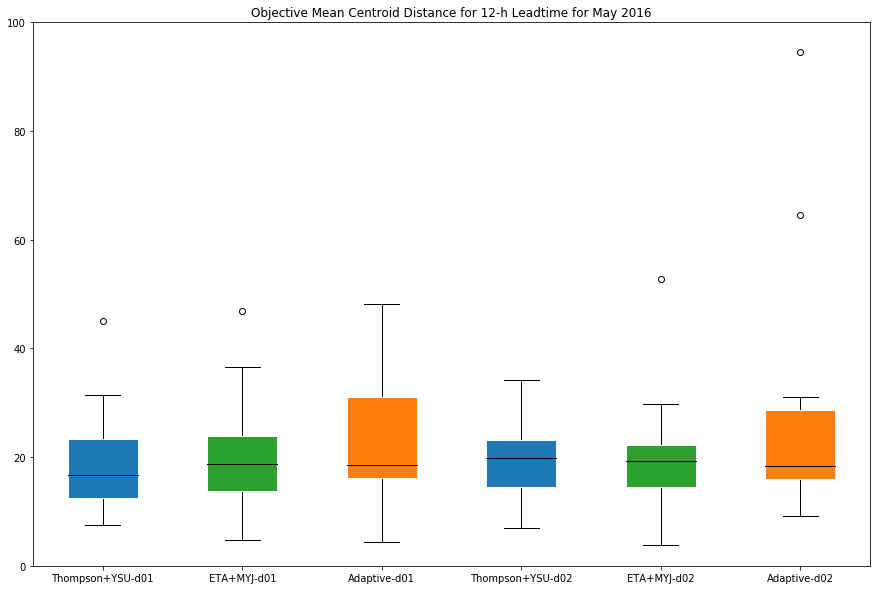

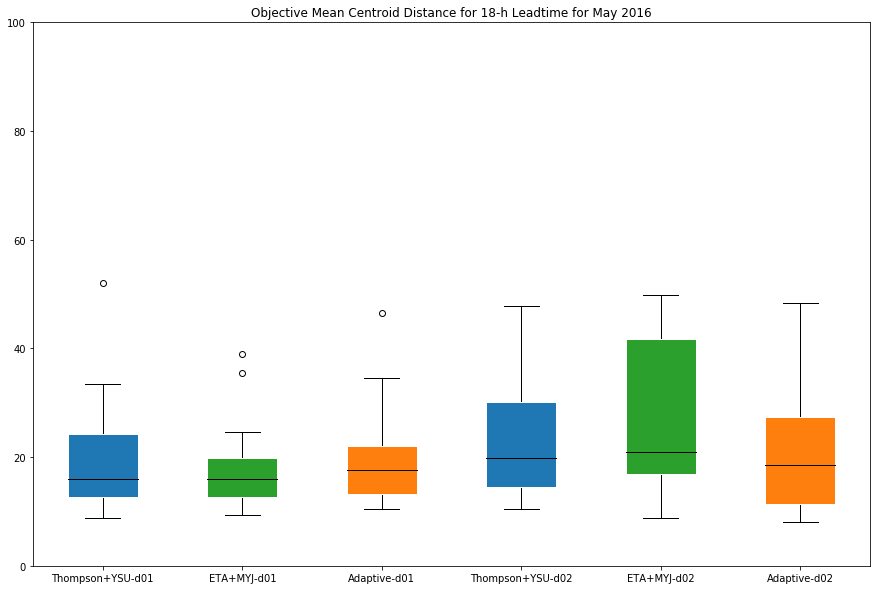

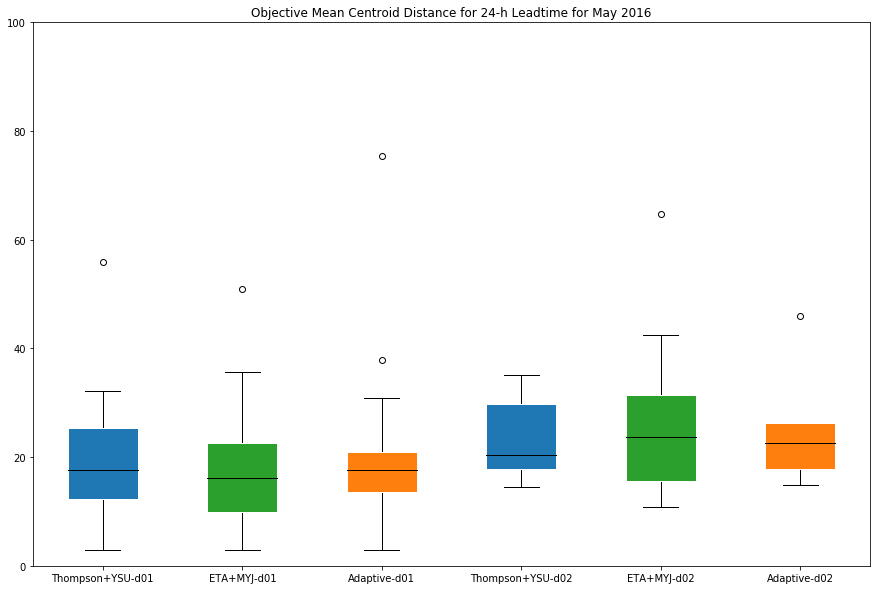

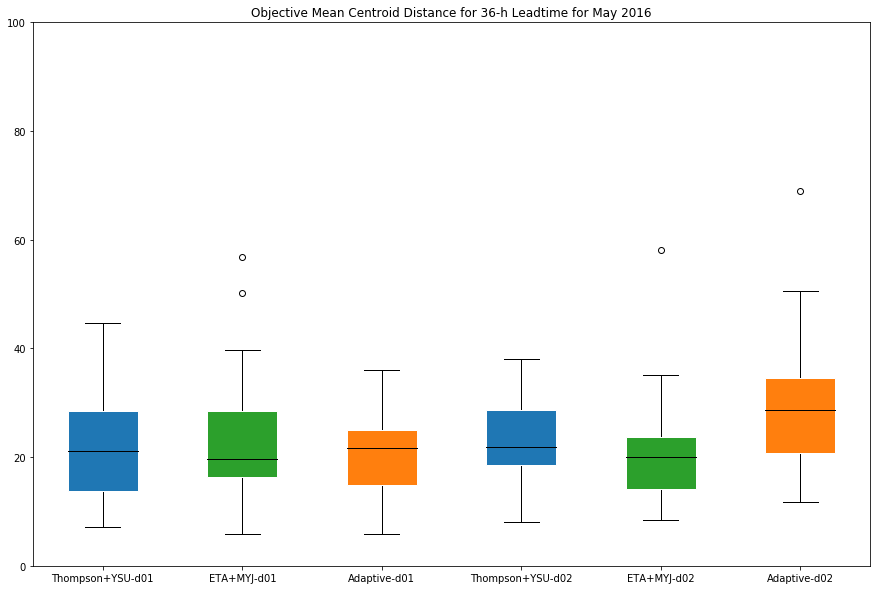

In [10]:
dates = list(pd.date_range(start='2016-05-02T12',
                     end='2016-05-31T12',
                     freq='1D'))
for missing in missing_dates:
    if missing in dates:
        dates.remove(missing)

members = ['control_thompson', 'control_ETA', 'adaptive_wrf']
for fhour in [12, 18, 24, 36]:
    cen_data = {}
    for domain in [1, 2]:
        for member in members:
            data = []
            for date in dates:
                valid = date + pd.Timedelta(hours=fhour)
                if domain == 1:
                    file = ('/lustre/work/twixtrom/adaptive_verif_best/'+member+'/'+date.strftime('%Y%m%d%H')+'/'+
                            str(domain)+'/'+str(fhour)+'/mode_'+str(fhour)+'0000L_'+valid.strftime('%Y%m%d')+'_'+
                            valid.strftime('%H')+'0000V_030000A_obj.txt')
                else:
                    file = ('/lustre/work/twixtrom/adaptive_verif_best/'+member+'/'+date.strftime('%Y%m%d%H')+'/'+
                            str(domain)+'/'+str(fhour)+'/mode_'+str(fhour)+'0000L_'+valid.strftime('%Y%m%d')+'_'+
                            valid.strftime('%H')+'0000V_010000A_obj.txt')
                try:
                    obj_file = pd.read_csv(file, delim_whitespace=True)
                    dist = []
                    for i in range(obj_file['OBJECT_ID'].shape[0]):
                        if re.match(r'CF..._CO...', obj_file['OBJECT_ID'][i]):
                            dist.append(obj_file['CENTROID_DIST'][i])
                    try:
                        data.append(np.array(dist).mean())
                    except RuntimeWarning:
                        data.append(np.nan)
                except FileNotFoundError:
                    data.append(np.nan)
            cen_data[member+' - Domain '+str(domain)] = np.array(data)

    labels = ['Thompson+YSU-d01', 'ETA+MYJ-d01', 'Adaptive-d01',
              'Thompson+YSU-d02', 'ETA+MYJ-d02', 'Adaptive-d02']
    dataframe = pd.DataFrame(data=cen_data)
    dataframe.columns = labels

    bp = dataframe.plot.box(figsize=(15,10), color={'medians': 'k', 'boxes': 'white', 'whiskers': 'k'}, return_type='dict',  patch_artist=True)
    colors = ['tab:blue', 'tab:green', 'tab:orange', 'tab:blue', 'tab:green', 'tab:orange']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    plt.title('Objective Mean Centroid Distance for '+str(fhour)+'-h Leadtime for May 2016')
    plt.ylim(0, 100)
    plt.show()

#### July Cases, Clustered Objects

/home/twixtrom/miniconda3/envs/analogue/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: Mean of empty slice.


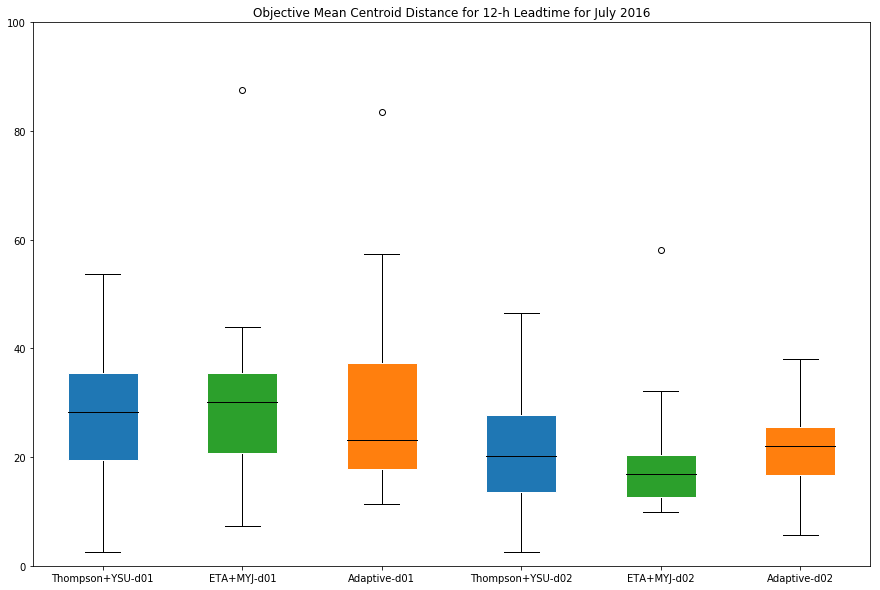

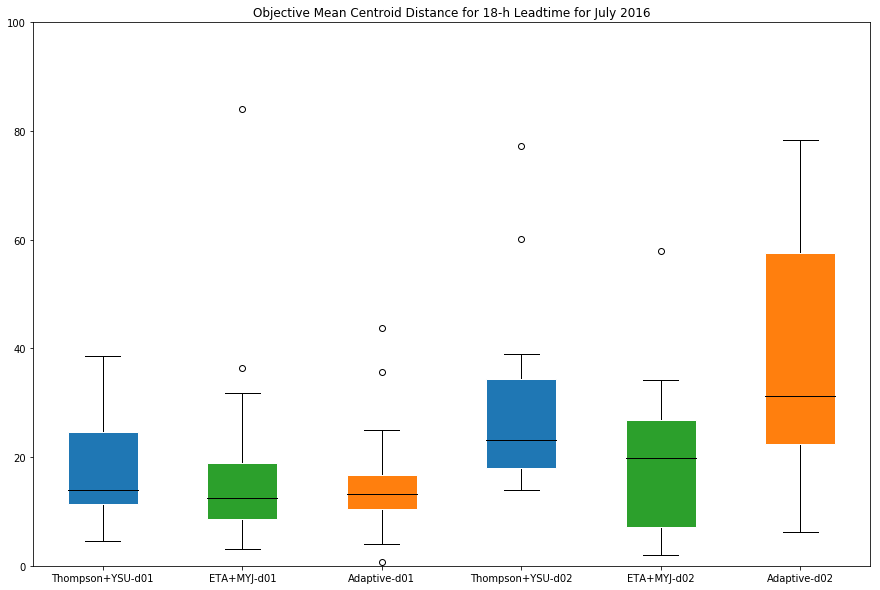

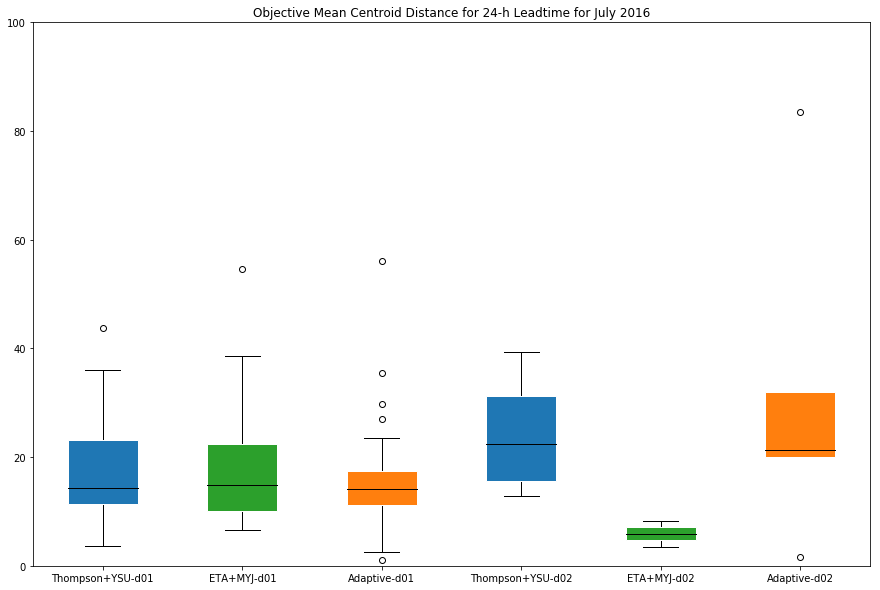

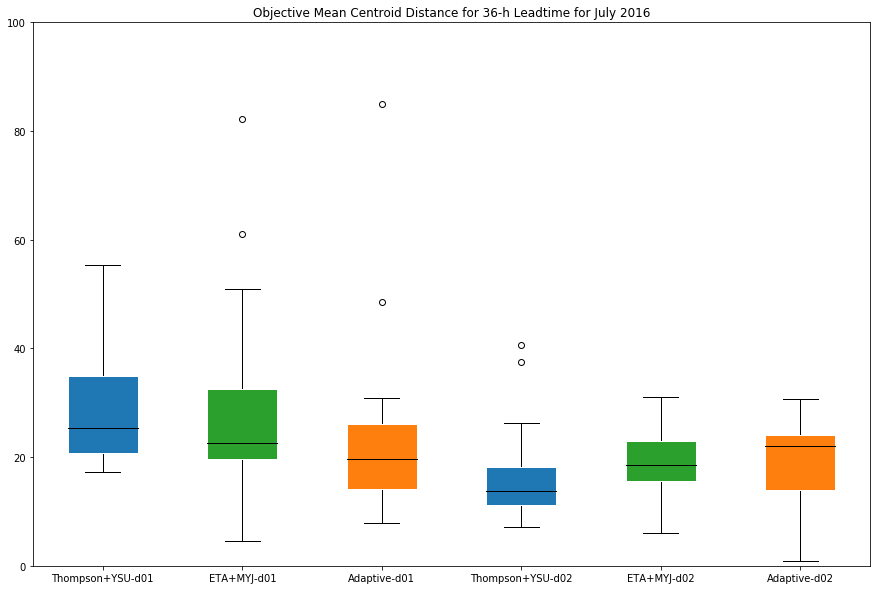

In [11]:
dates = list(pd.date_range(start='2016-07-02T12',
                     end='2016-07-31T12',
                     freq='1D'))
for missing in missing_dates:
    if missing in dates:
        dates.remove(missing)

members = ['control_thompson', 'control_ETA', 'adaptive_wrf']
for fhour in [12, 18, 24, 36]:
    cen_data = {}
    for domain in [1, 2]:
        for member in members:
            data = []
            for date in dates:
                valid = date + pd.Timedelta(hours=fhour)
                if domain == 1:
                    file = ('/lustre/work/twixtrom/adaptive_verif_best/'+member+'/'+date.strftime('%Y%m%d%H')+'/'+
                            str(domain)+'/'+str(fhour)+'/mode_'+str(fhour)+'0000L_'+valid.strftime('%Y%m%d')+'_'+
                            valid.strftime('%H')+'0000V_030000A_obj.txt')
                else:
                    file = ('/lustre/work/twixtrom/adaptive_verif_best/'+member+'/'+date.strftime('%Y%m%d%H')+'/'+
                            str(domain)+'/'+str(fhour)+'/mode_'+str(fhour)+'0000L_'+valid.strftime('%Y%m%d')+'_'+
                            valid.strftime('%H')+'0000V_010000A_obj.txt')
                try:
                    obj_file = pd.read_csv(file, delim_whitespace=True)
                    dist = []
                    for i in range(obj_file['OBJECT_ID'].shape[0]):
                        if re.match(r'CF..._CO...', obj_file['OBJECT_ID'][i]):
                            dist.append(obj_file['CENTROID_DIST'][i])
                    try:
                        data.append(np.array(dist).mean())
                    except RuntimeWarning:
                        data.append(np.nan)
                except FileNotFoundError:
                    data.append(np.nan)
            cen_data[member+' - Domain '+str(domain)] = np.array(data)

    labels = ['Thompson+YSU-d01', 'ETA+MYJ-d01', 'Adaptive-d01',
              'Thompson+YSU-d02', 'ETA+MYJ-d02', 'Adaptive-d02']
    dataframe = pd.DataFrame(data=cen_data)
    dataframe.columns = labels

    bp = dataframe.plot.box(figsize=(15,10), color={'medians': 'k', 'boxes': 'white', 'whiskers': 'k'}, return_type='dict',  patch_artist=True)
    colors = ['tab:blue', 'tab:green', 'tab:orange', 'tab:blue', 'tab:green', 'tab:orange']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    plt.title('Objective Mean Centroid Distance for '+str(fhour)+'-h Leadtime for July 2016')
    plt.ylim(0, 100)
    plt.show()

#### All Cases, Clustered Objects, Interesction Area / Union Area

/home/twixtrom/miniconda3/envs/analogue/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: Mean of empty slice.
/home/twixtrom/miniconda3/envs/analogue/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in double_scalars


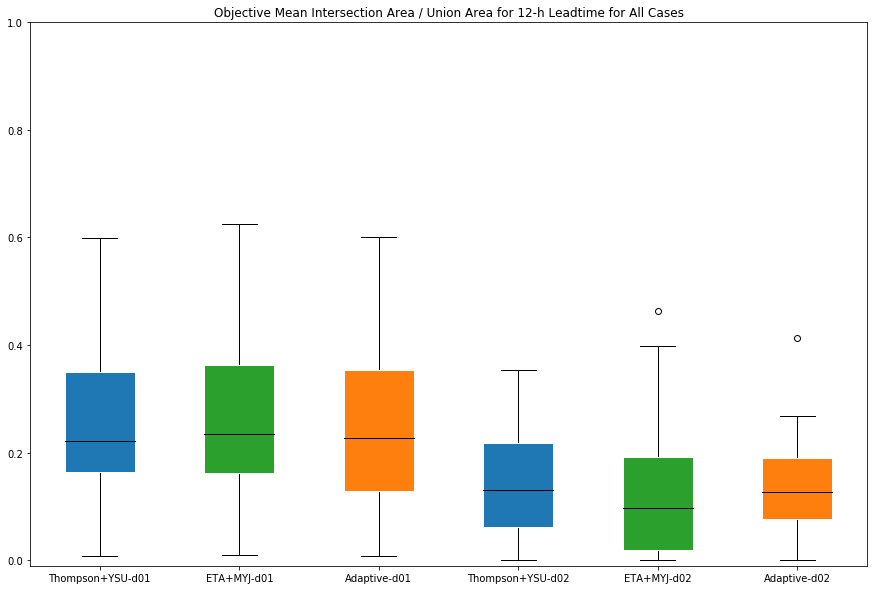

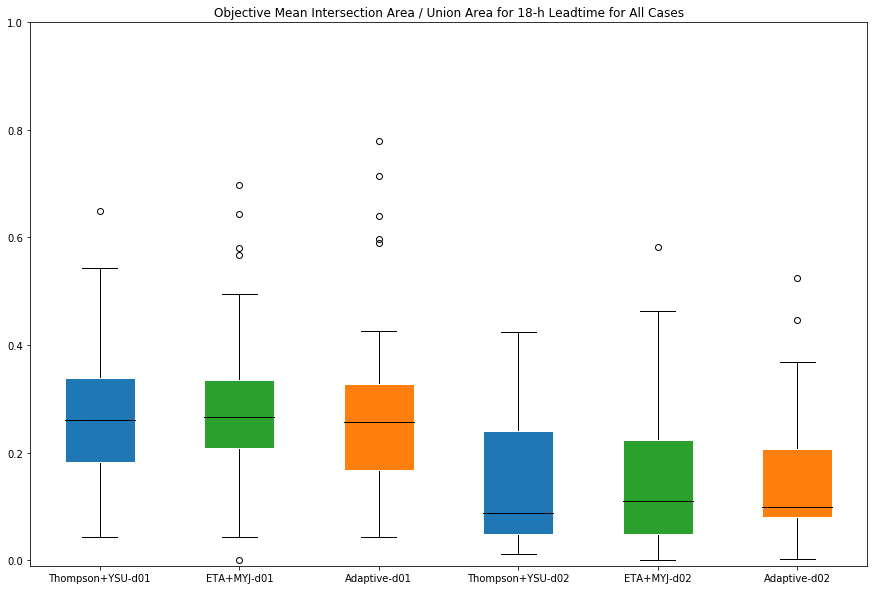

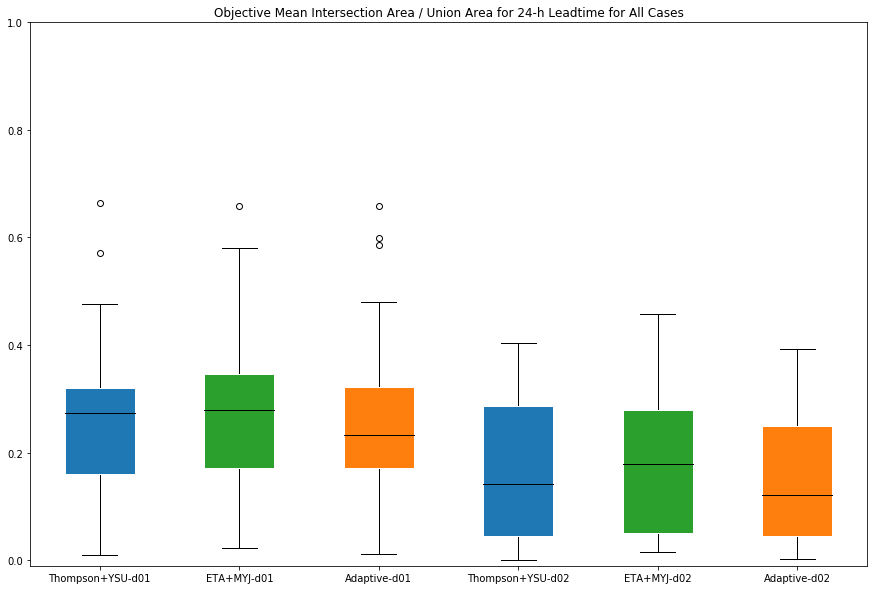

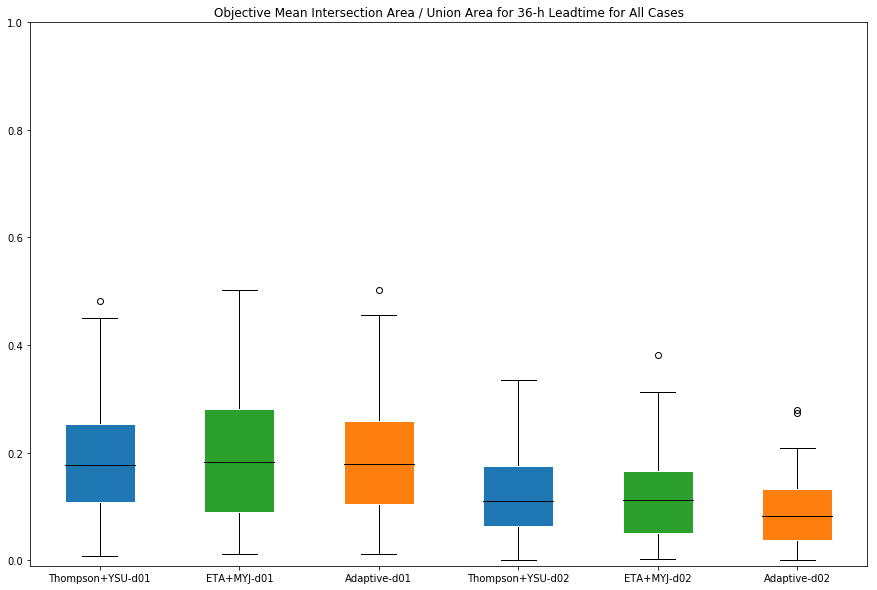

In [12]:
all_dates = []
for date in pd.date_range(start='2016-01-02T12', end='2016-01-31T12', freq='1D'):
    all_dates.append(date)
for date in pd.date_range(start='2016-05-02T12', end='2016-05-31T12', freq='1D'):
    all_dates.append(date)
for date in pd.date_range(start='2016-07-02T12', end='2016-07-31T12', freq='1D'):
    all_dates.append(date)
    
for missing in missing_dates:
    if missing in all_dates:
        all_dates.remove(missing)

members = ['control_thompson', 'control_ETA', 'adaptive_wrf']
for fhour in [12, 18, 24, 36]:
    cen_data = {}
    for domain in [1, 2]:
        for member in members:
            data = []
            for date in all_dates:
                valid = date + pd.Timedelta(hours=fhour)
                if domain == 1:
                    file = ('/lustre/work/twixtrom/adaptive_verif_best/'+member+'/'+date.strftime('%Y%m%d%H')+'/'+
                            str(domain)+'/'+str(fhour)+'/mode_'+str(fhour)+'0000L_'+valid.strftime('%Y%m%d')+'_'+
                            valid.strftime('%H')+'0000V_030000A_obj.txt')
                else:
                    file = ('/lustre/work/twixtrom/adaptive_verif_best/'+member+'/'+date.strftime('%Y%m%d%H')+'/'+
                            str(domain)+'/'+str(fhour)+'/mode_'+str(fhour)+'0000L_'+valid.strftime('%Y%m%d')+'_'+
                            valid.strftime('%H')+'0000V_010000A_obj.txt')
                try:
                    obj_file = pd.read_csv(file, delim_whitespace=True)
                    dist = []
                    for i in range(obj_file['OBJECT_ID'].shape[0]):
                        if re.match(r'CF..._CO...', obj_file['OBJECT_ID'][i]):
                            dist.append(obj_file['INTERSECTION_AREA'][i] / obj_file['UNION_AREA'][i])
                    try:
                        data.append(np.array(dist).mean())
                    except RuntimeWarning:
                        data.append(np.nan)
                except FileNotFoundError:
                    data.append(np.nan)
            cen_data[member+' - Domain '+str(domain)] = np.array(data)

    labels = ['Thompson+YSU-d01', 'ETA+MYJ-d01', 'Adaptive-d01',
              'Thompson+YSU-d02', 'ETA+MYJ-d02', 'Adaptive-d02']
    dataframe = pd.DataFrame(data=cen_data)
    dataframe.columns = labels

    bp = dataframe.plot.box(figsize=(15,10), color={'medians': 'k', 'boxes': 'white', 'whiskers': 'k'}, return_type='dict',  patch_artist=True)
    colors = ['tab:blue', 'tab:green', 'tab:orange', 'tab:blue', 'tab:green', 'tab:orange']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    plt.title('Objective Mean Intersection Area / Union Area for '+str(fhour)+'-h Leadtime for All Cases')
    plt.ylim(-0.01, 1)
    plt.show()

/home/twixtrom/miniconda3/envs/analogue/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice.


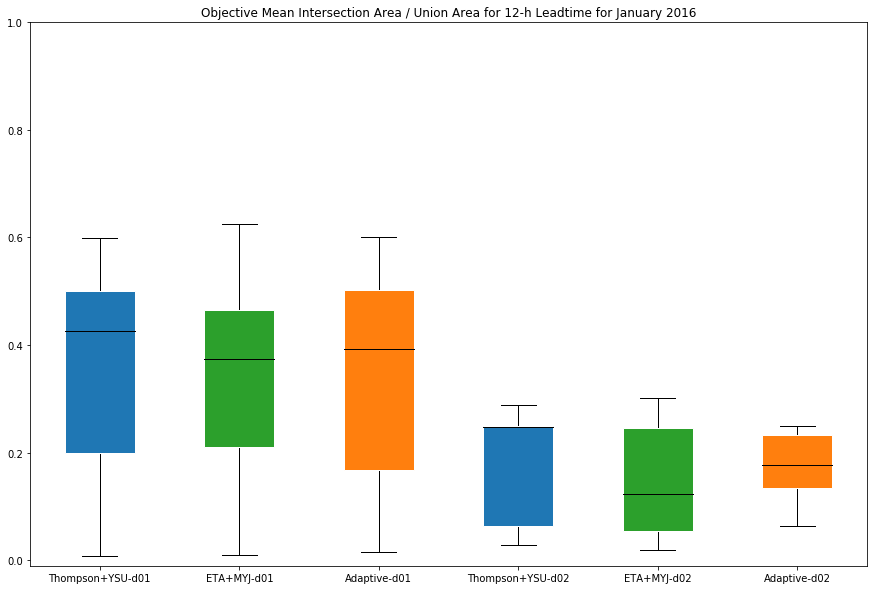

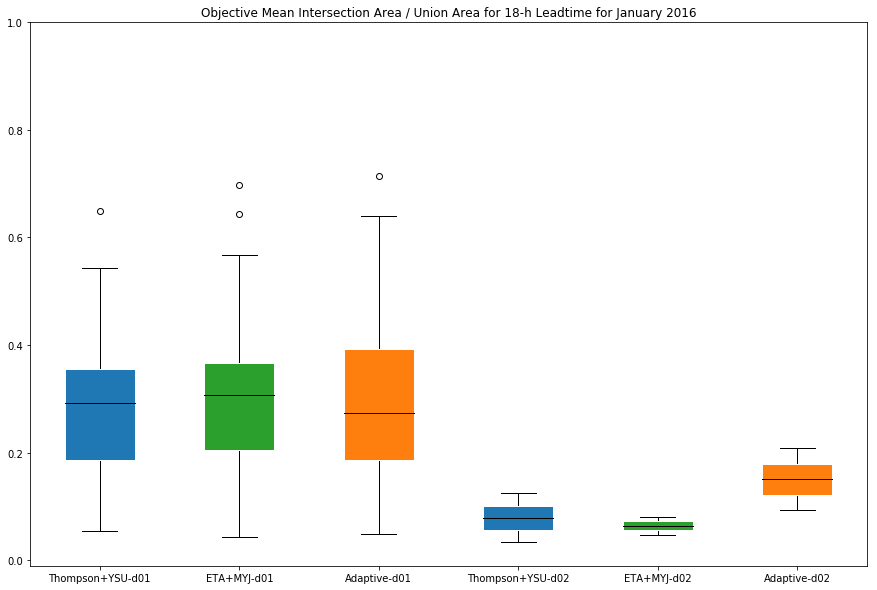

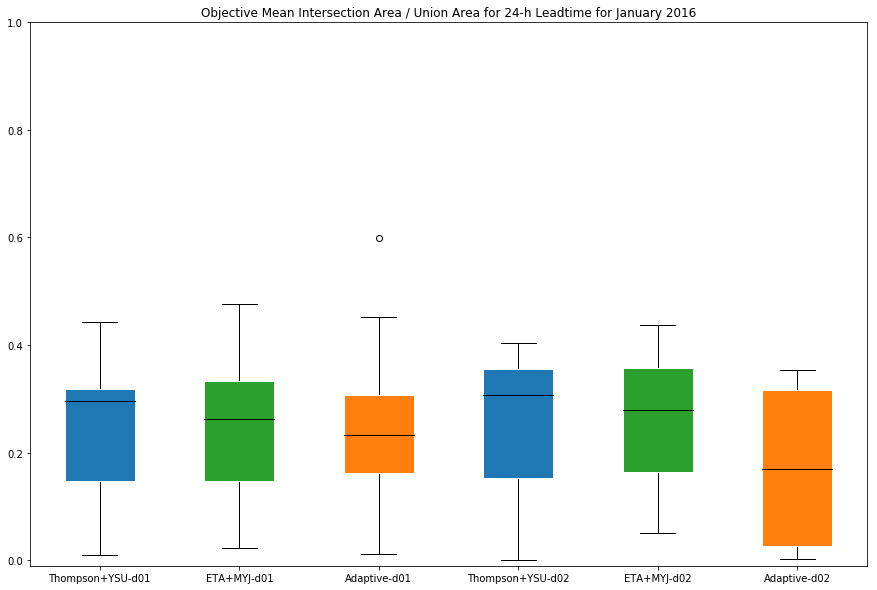

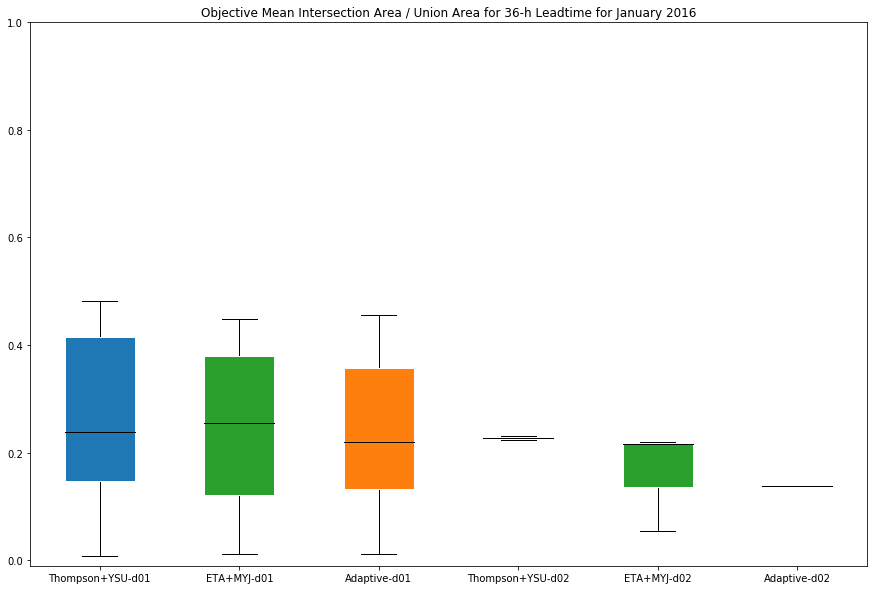

In [13]:
dates = list(pd.date_range(start='2016-01-02T12',
                     end='2016-01-31T12',
                     freq='1D'))
for missing in missing_dates:
    if missing in dates:
        dates.remove(missing)
members = ['control_thompson', 'control_ETA', 'adaptive_wrf']
for fhour in [12, 18, 24, 36]:
    cen_data = {}
    for domain in [1, 2]:
        for member in members:
            data = []
            for date in dates:
                valid = date + pd.Timedelta(hours=fhour)
                if domain == 1:
                    file = ('/lustre/work/twixtrom/adaptive_verif_best/'+member+'/'+date.strftime('%Y%m%d%H')+'/'+
                            str(domain)+'/'+str(fhour)+'/mode_'+str(fhour)+'0000L_'+valid.strftime('%Y%m%d')+'_'+
                            valid.strftime('%H')+'0000V_030000A_obj.txt')
                else:
                    file = ('/lustre/work/twixtrom/adaptive_verif_best/'+member+'/'+date.strftime('%Y%m%d%H')+'/'+
                            str(domain)+'/'+str(fhour)+'/mode_'+str(fhour)+'0000L_'+valid.strftime('%Y%m%d')+'_'+
                            valid.strftime('%H')+'0000V_010000A_obj.txt')
                try:
                    obj_file = pd.read_csv(file, delim_whitespace=True)
                    dist = []
                    for i in range(obj_file['OBJECT_ID'].shape[0]):
                        if re.match(r'CF..._CO...', obj_file['OBJECT_ID'][i]):
                            dist.append(obj_file['INTERSECTION_AREA'][i] / obj_file['UNION_AREA'][i])
                    try:
                        data.append(np.array(dist).mean())
                    except RuntimeWarning:
                        data.append(np.nan)
                except FileNotFoundError:
                    data.append(np.nan)
            cen_data[member+' - Domain '+str(domain)] = np.array(data)

    labels = ['Thompson+YSU-d01', 'ETA+MYJ-d01', 'Adaptive-d01',
              'Thompson+YSU-d02', 'ETA+MYJ-d02', 'Adaptive-d02']
    dataframe = pd.DataFrame(data=cen_data)
    dataframe.columns = labels

    bp = dataframe.plot.box(figsize=(15,10), color={'medians': 'k', 'boxes': 'white', 'whiskers': 'k'}, return_type='dict',  patch_artist=True)
    colors = ['tab:blue', 'tab:green', 'tab:orange', 'tab:blue', 'tab:green', 'tab:orange']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    plt.title('Objective Mean Intersection Area / Union Area for '+str(fhour)+'-h Leadtime for January 2016')
    plt.ylim(-0.01, 1)
    plt.show()

/home/twixtrom/miniconda3/envs/analogue/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars
/home/twixtrom/miniconda3/envs/analogue/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice.


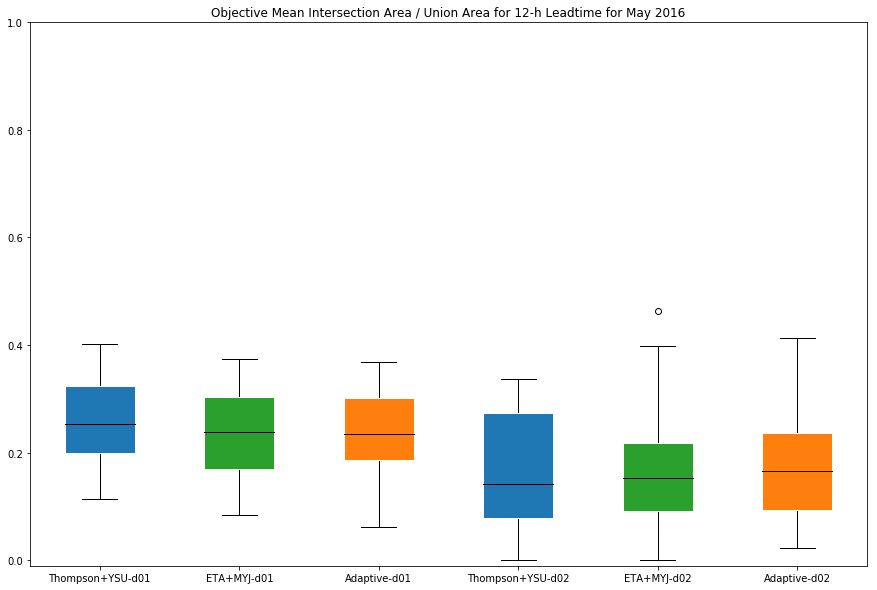

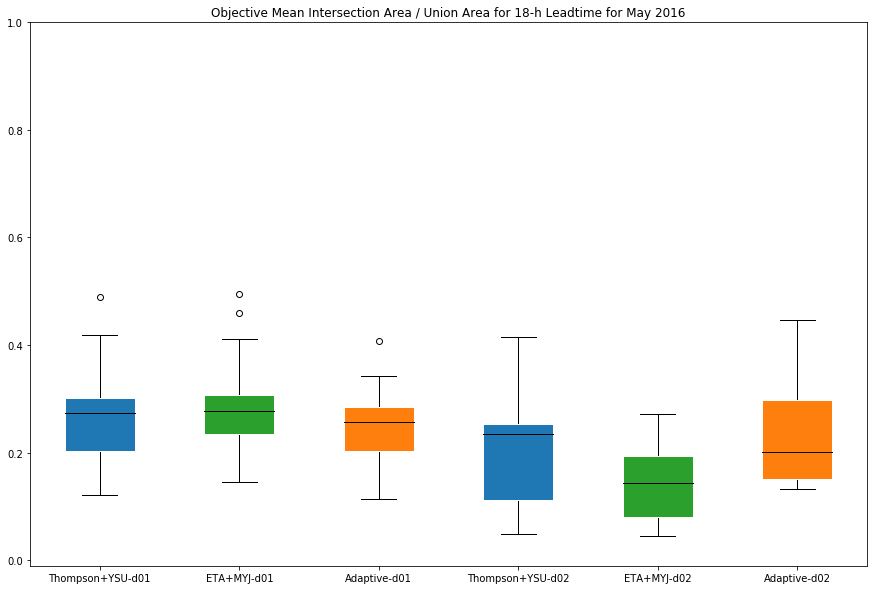

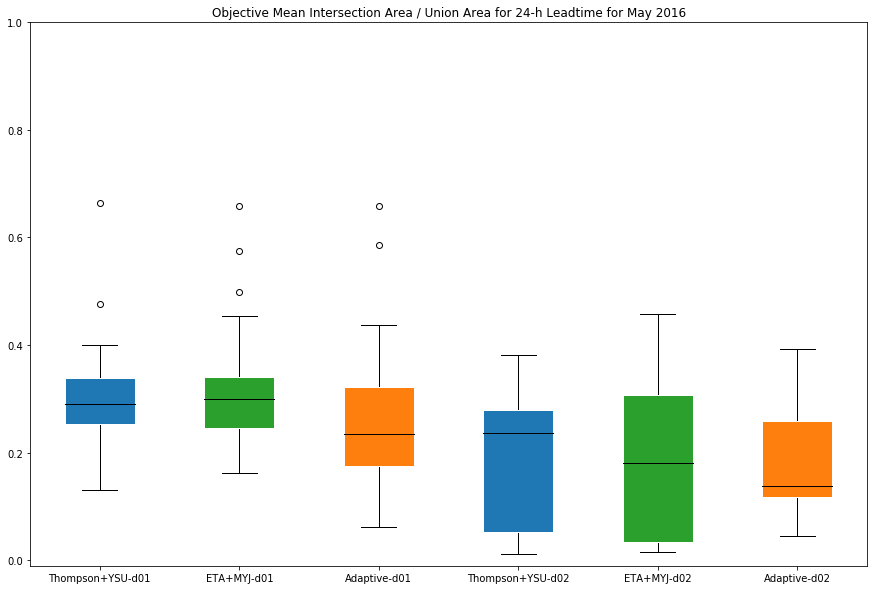

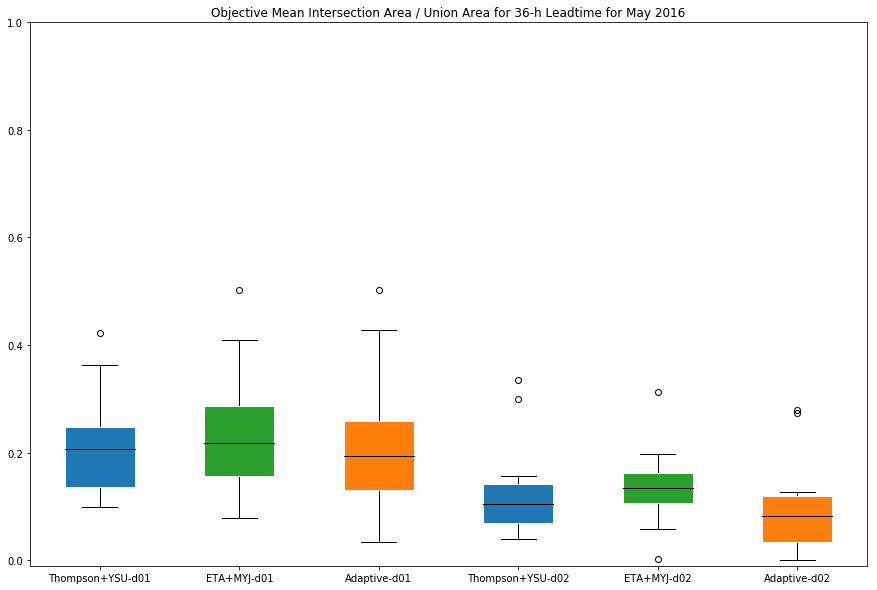

In [14]:
dates = list(pd.date_range(start='2016-05-02T12',
                     end='2016-05-31T12',
                     freq='1D'))
for missing in missing_dates:
    if missing in dates:
        dates.remove(missing)
members = ['control_thompson', 'control_ETA', 'adaptive_wrf']
for fhour in [12, 18, 24, 36]:
    cen_data = {}
    for domain in [1, 2]:
        for member in members:
            data = []
            for date in dates:
                valid = date + pd.Timedelta(hours=fhour)
                if domain == 1:
                    file = ('/lustre/work/twixtrom/adaptive_verif_best/'+member+'/'+date.strftime('%Y%m%d%H')+'/'+
                            str(domain)+'/'+str(fhour)+'/mode_'+str(fhour)+'0000L_'+valid.strftime('%Y%m%d')+'_'+
                            valid.strftime('%H')+'0000V_030000A_obj.txt')
                else:
                    file = ('/lustre/work/twixtrom/adaptive_verif_best/'+member+'/'+date.strftime('%Y%m%d%H')+'/'+
                            str(domain)+'/'+str(fhour)+'/mode_'+str(fhour)+'0000L_'+valid.strftime('%Y%m%d')+'_'+
                            valid.strftime('%H')+'0000V_010000A_obj.txt')
                try:
                    obj_file = pd.read_csv(file, delim_whitespace=True)
                    dist = []
                    for i in range(obj_file['OBJECT_ID'].shape[0]):
                        if re.match(r'CF..._CO...', obj_file['OBJECT_ID'][i]):
                            dist.append(obj_file['INTERSECTION_AREA'][i] / obj_file['UNION_AREA'][i])
                    try:
                        data.append(np.array(dist).mean())
                    except RuntimeWarning:
                        data.append(np.nan)
                except FileNotFoundError:
                    data.append(np.nan)
            cen_data[member+' - Domain '+str(domain)] = np.array(data)

    labels = ['Thompson+YSU-d01', 'ETA+MYJ-d01', 'Adaptive-d01',
              'Thompson+YSU-d02', 'ETA+MYJ-d02', 'Adaptive-d02']
    dataframe = pd.DataFrame(data=cen_data)
    dataframe.columns = labels

    bp = dataframe.plot.box(figsize=(15,10), color={'medians': 'k', 'boxes': 'white', 'whiskers': 'k'}, return_type='dict',  patch_artist=True)
    colors = ['tab:blue', 'tab:green', 'tab:orange', 'tab:blue', 'tab:green', 'tab:orange']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    plt.title('Objective Mean Intersection Area / Union Area for '+str(fhour)+'-h Leadtime for May 2016')
    plt.ylim(-0.01, 1)
    plt.show()

/home/twixtrom/miniconda3/envs/analogue/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice.
/home/twixtrom/miniconda3/envs/analogue/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


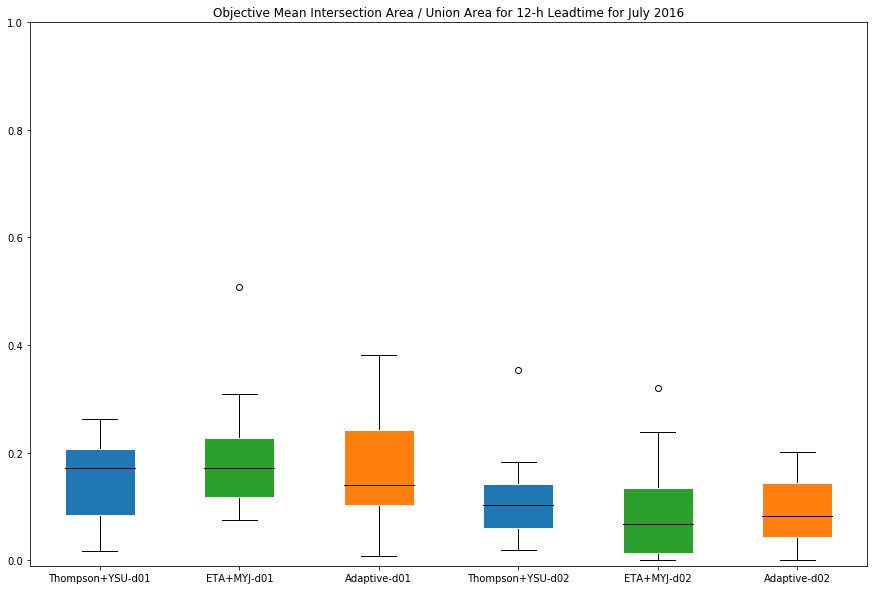

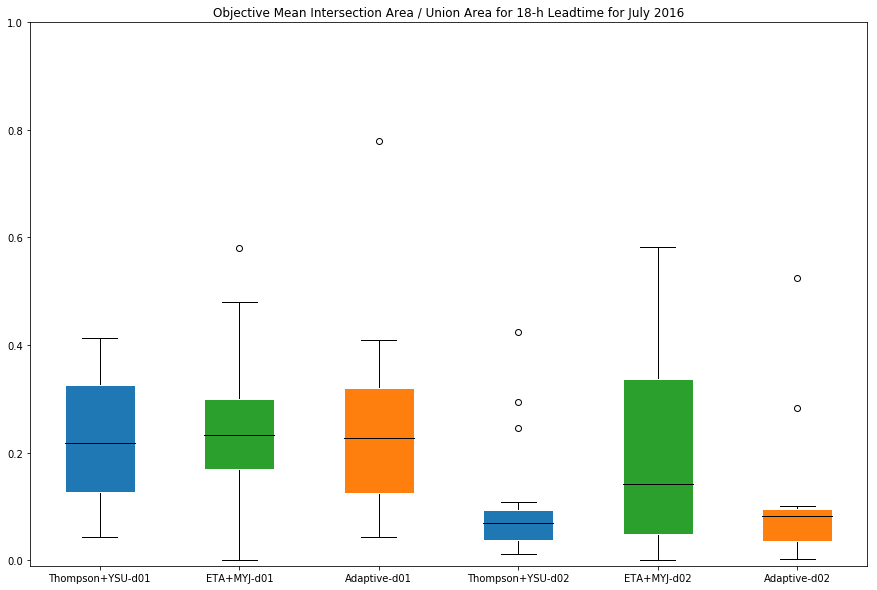

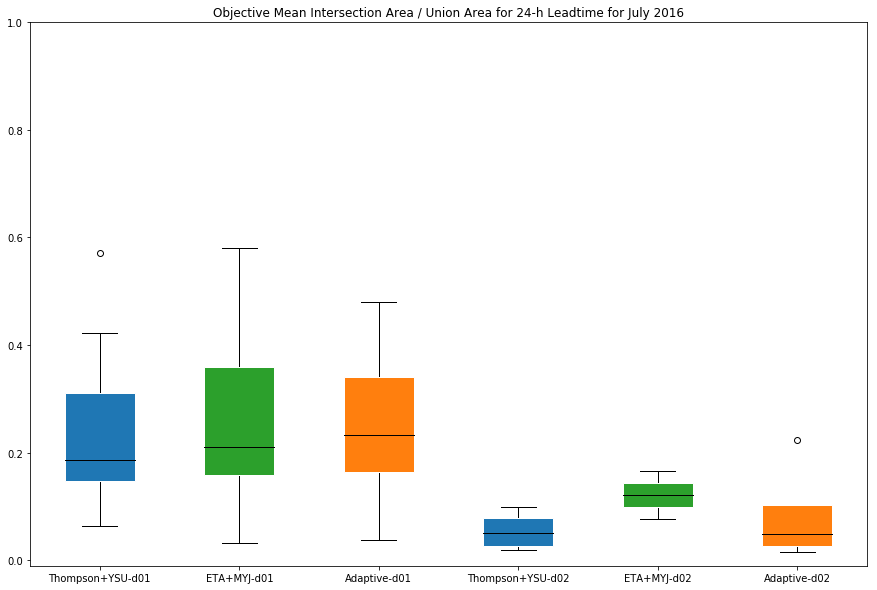

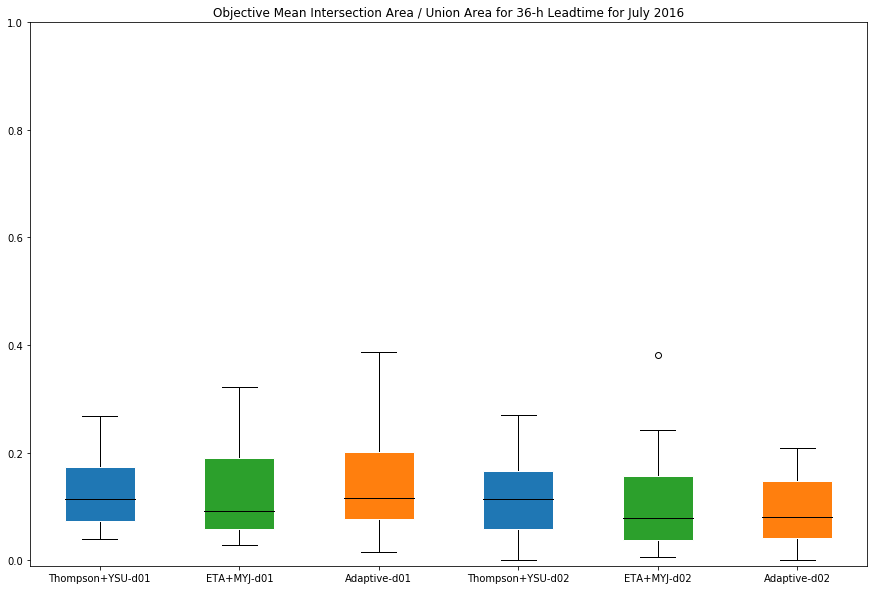

In [15]:
dates = list(pd.date_range(start='2016-07-02T12',
                     end='2016-07-31T12',
                     freq='1D'))
for missing in missing_dates:
    if missing in dates:
        dates.remove(missing)
members = ['control_thompson', 'control_ETA', 'adaptive_wrf']
for fhour in [12, 18, 24, 36]:
    cen_data = {}
    for domain in [1, 2]:
        for member in members:
            data = []
            for date in dates:
                valid = date + pd.Timedelta(hours=fhour)
                if domain == 1:
                    file = ('/lustre/work/twixtrom/adaptive_verif_best/'+member+'/'+date.strftime('%Y%m%d%H')+'/'+
                            str(domain)+'/'+str(fhour)+'/mode_'+str(fhour)+'0000L_'+valid.strftime('%Y%m%d')+'_'+
                            valid.strftime('%H')+'0000V_030000A_obj.txt')
                else:
                    file = ('/lustre/work/twixtrom/adaptive_verif_best/'+member+'/'+date.strftime('%Y%m%d%H')+'/'+
                            str(domain)+'/'+str(fhour)+'/mode_'+str(fhour)+'0000L_'+valid.strftime('%Y%m%d')+'_'+
                            valid.strftime('%H')+'0000V_010000A_obj.txt')
                try:
                    obj_file = pd.read_csv(file, delim_whitespace=True)
                    dist = []
                    for i in range(obj_file['OBJECT_ID'].shape[0]):
                        if re.match(r'CF..._CO...', obj_file['OBJECT_ID'][i]):
                            dist.append(obj_file['INTERSECTION_AREA'][i] / obj_file['UNION_AREA'][i])
                    try:
                        data.append(np.array(dist).mean())
                    except RuntimeWarning:
                        data.append(np.nan)
                except FileNotFoundError:
                    data.append(np.nan)
            cen_data[member+' - Domain '+str(domain)] = np.array(data)

    labels = ['Thompson+YSU-d01', 'ETA+MYJ-d01', 'Adaptive-d01',
              'Thompson+YSU-d02', 'ETA+MYJ-d02', 'Adaptive-d02']
    dataframe = pd.DataFrame(data=cen_data)
    dataframe.columns = labels

    bp = dataframe.plot.box(figsize=(15,10), color={'medians': 'k', 'boxes': 'white', 'whiskers': 'k'}, return_type='dict',  patch_artist=True)
    colors = ['tab:blue', 'tab:green', 'tab:orange', 'tab:blue', 'tab:green', 'tab:orange']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    plt.title('Objective Mean Intersection Area / Union Area for '+str(fhour)+'-h Leadtime for July 2016')
    plt.ylim(-0.01, 1)
    plt.show()